In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from pychembldb import *

load rdk schema


In [2]:
query = chembldb.query(Mols, Assay, Activity, TargetDictionary)

In [3]:
res = query.join(Activity).join(
                                TargetDictionary).filter(
                                Mols.molregno==Activity.molregno).filter(
                                TargetDictionary.chembl_id=='CHEMBL2362975').filter(
                                Activity.standard_type=='LogD')

In [4]:
res.count()

17850

In [5]:
mols = []
for row in res:
    if row[0].m != None:
        mols.append(row[0].m)

In [6]:
len(mols)

17850

In [7]:
matchmols = []
querymol = Chem.MolFromSmiles('c1cncnc1')

In [8]:
for mol in mols:
    if mol.HasSubstructMatch(querymol):
        matchmols.append(mol)

In [9]:
len(matchmols)

2835

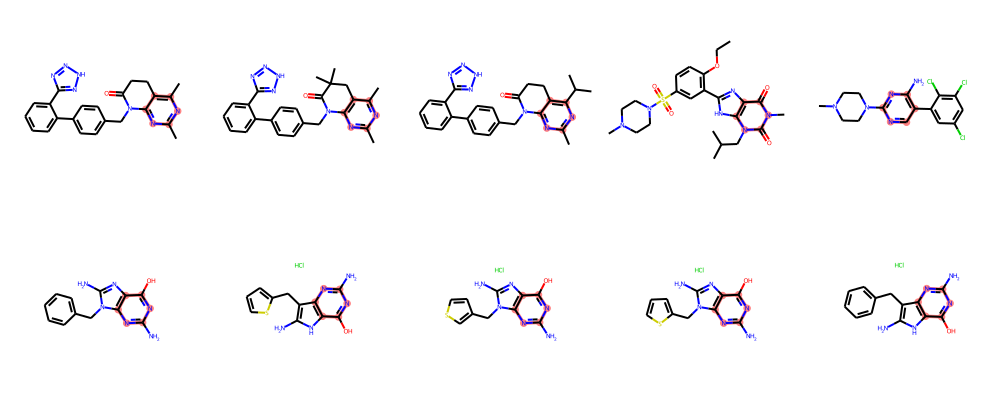

In [10]:
Draw.MolsToGridImage(matchmols[:10], molsPerRow=5, highlightAtomLists=[mol.GetSubstructMatch(querymol) for mol in matchmols[:20]])

In [11]:
query = chembldb.query(Mols, Assay, Activity, TargetDictionary)
res2 = query.join(Activity).join(
                                TargetDictionary).filter(
                                Mols.molregno==Activity.molregno).filter(
                                TargetDictionary.chembl_id=='CHEMBL2362975').filter(
                                Activity.standard_type=='LogD').filter(
                                Mols.m.hassubstruct('c1cncnc1')
)


In [12]:
print(res2)

SELECT rdk.mols.molregno AS rdk_mols_molregno, mol_to_pkl(rdk.mols.m) AS rdk_mols_m, assays.assay_id AS assays_assay_id, assays.doc_id AS assays_doc_id, assays.description AS assays_description, assays.assay_type AS assays_assay_type, assays.assay_test_type AS assays_assay_test_type, assays.assay_category AS assays_assay_category, assays.assay_organism AS assays_assay_organism, assays.assay_tax_id AS assays_assay_tax_id, assays.assay_strain AS assays_assay_strain, assays.assay_tissue AS assays_assay_tissue, assays.assay_cell_type AS assays_assay_cell_type, assays.assay_subcellular_fraction AS assays_assay_subcellular_fraction, assays.tid AS assays_tid, assays.relationship_type AS assays_relationship_type, assays.confidence_score AS assays_confidence_score, assays.curated_by AS assays_curated_by, assays.activity_count AS assays_activity_count, assays.assay_source AS assays_assay_source, assays.src_id AS assays_src_id, assays.src_assay_id AS assays_src_assay_id, assays.chembl_id AS assay

In [13]:
mols2 = []
for row in res2:
    if row[0].m != None:
        mols2.append(row[0].m)

In [14]:
print(len(mols2), len(matchmols))

2835 2835


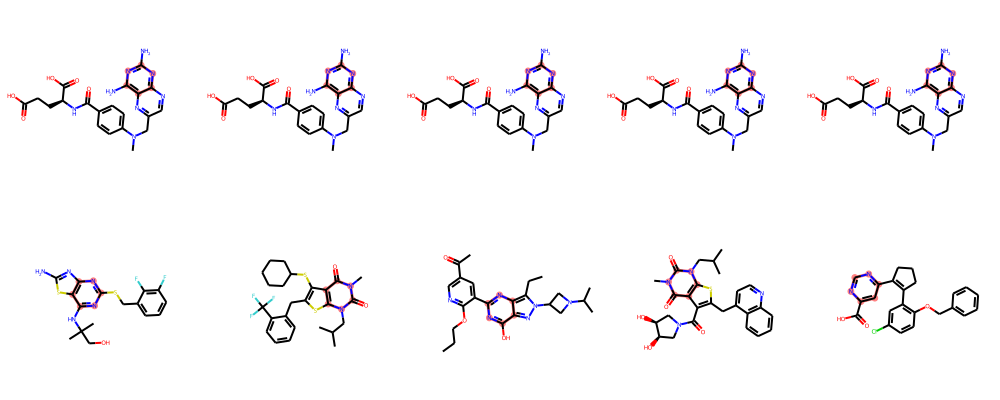

In [15]:
Draw.MolsToGridImage(mols2[:10], molsPerRow=5, highlightAtomLists=[mol.GetSubstructMatch(querymol) for mol in mols2[:10]])

In [16]:
rdk_imatinib = Chem.MolFromSmiles('CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5')
imatinib = 'CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5'

In [17]:
from razi.rdkit_postgresql.functions import morganbv_fp
from razi.rdkit_postgresql.functions import tanimoto_sml

In [18]:
query_bv = morganbv_fp(imatinib,2)
tanimotosim = tanimoto_sml(Fps.mfp2, query_bv).label('similarity')

query = chembldb.query(Assay, Activity, Mols, Fps, tanimotosim).join(Activity).filter(
    Activity.molregno==Mols.molregno).filter(
    Mols.molregno==Fps.molregno)



In [19]:
res = query.filter(Fps.mfp2.tanimoto_sml(query_bv)).order_by(desc('similarity'))

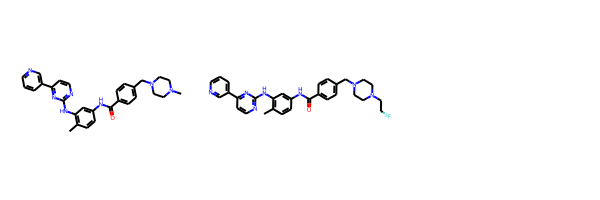

1609383 1609383 0.898550724637681


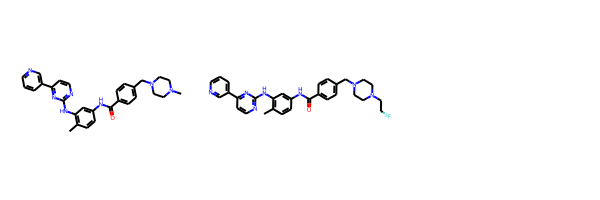

1609383 1609383 0.898550724637681


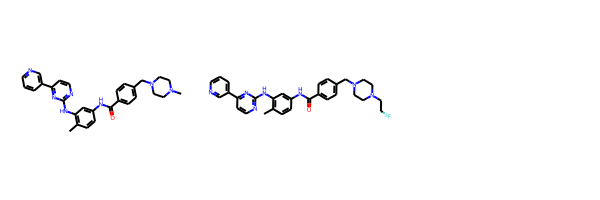

1609383 1609383 0.898550724637681


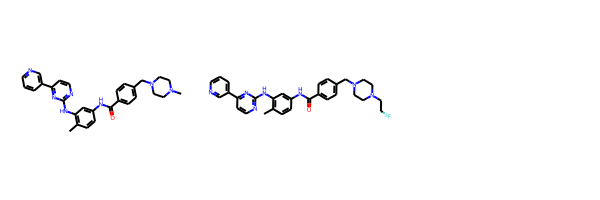

1609383 1609383 0.898550724637681


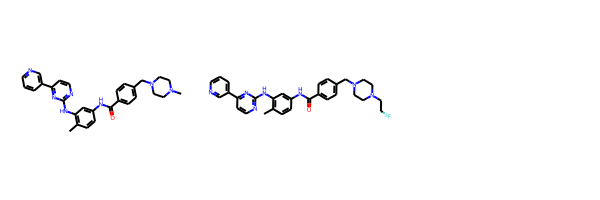

1609383 1609383 0.898550724637681


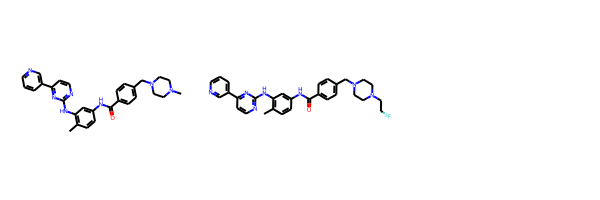

1609383 1609383 0.898550724637681


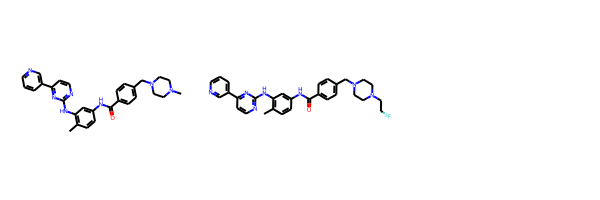

1609383 1609383 0.898550724637681


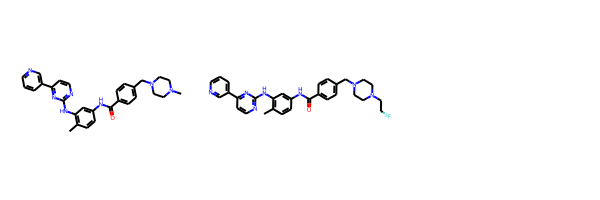

1609383 1609383 0.898550724637681


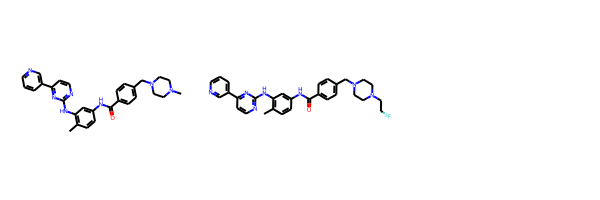

1609383 1609383 0.898550724637681


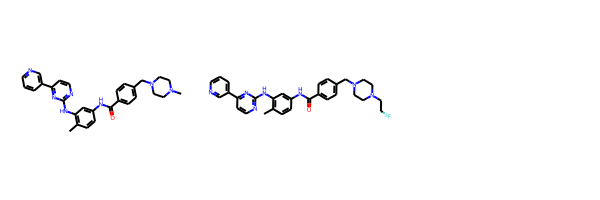

1609383 1609383 0.898550724637681


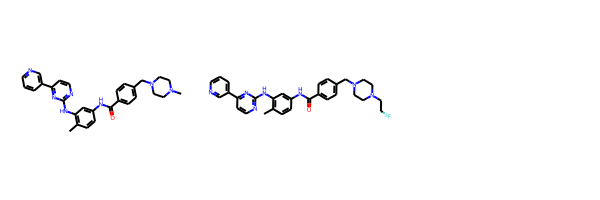

1609383 1609383 0.898550724637681


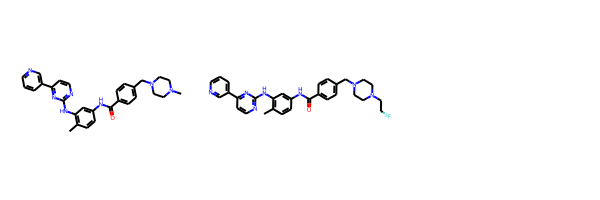

1609383 1609383 0.898550724637681


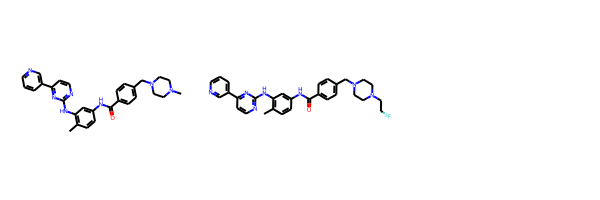

1609383 1609383 0.898550724637681


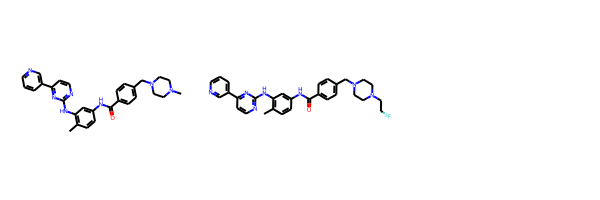

1609383 1609383 0.898550724637681


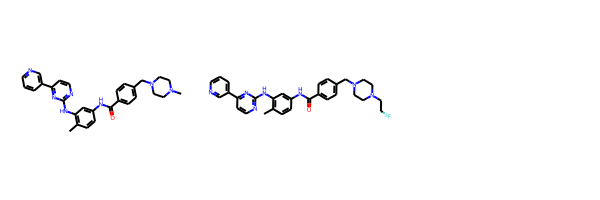

1609383 1609383 0.898550724637681


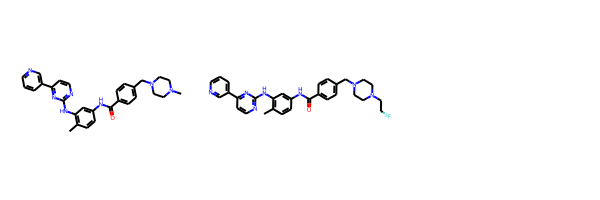

1609383 1609383 0.898550724637681


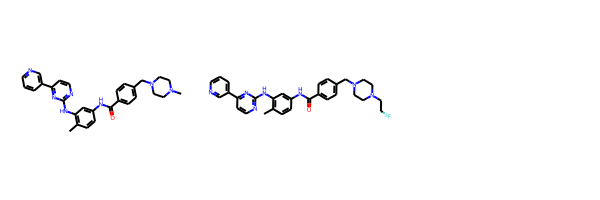

1609383 1609383 0.898550724637681


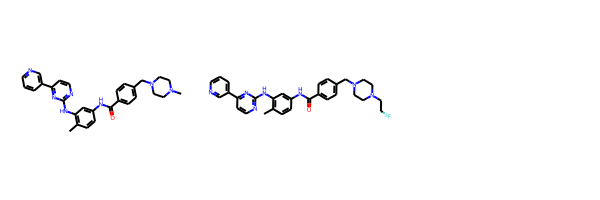

1609383 1609383 0.898550724637681


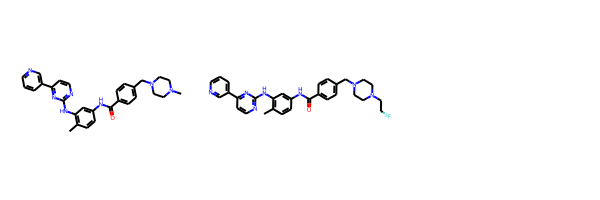

1609383 1609383 0.898550724637681


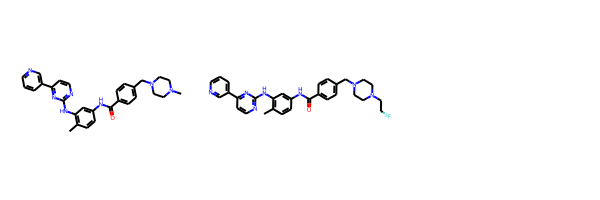

1609383 1609383 0.898550724637681


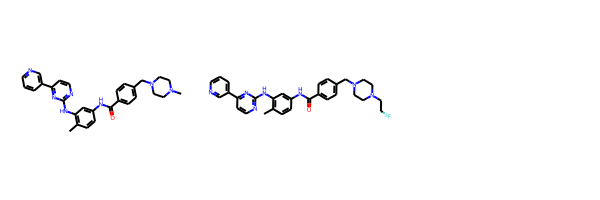

1609383 1609383 0.898550724637681


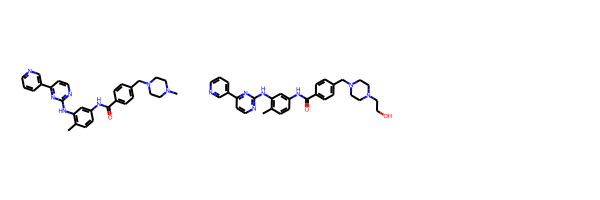

1609385 1609385 0.898550724637681


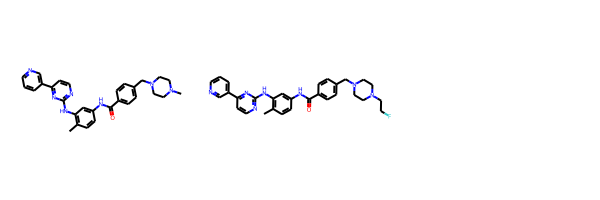

1609386 1609386 0.898550724637681


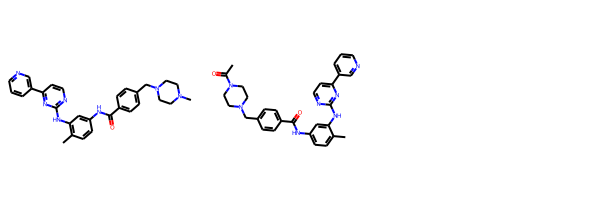

1563359 1563359 0.884057971014493


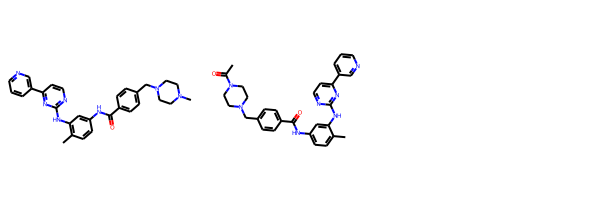

1563359 1563359 0.884057971014493


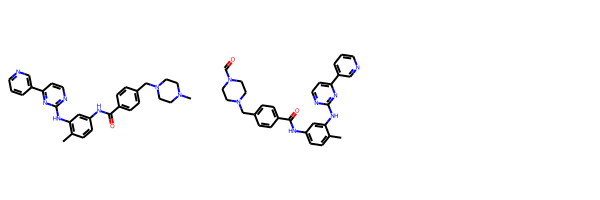

1563360 1563360 0.871428571428571


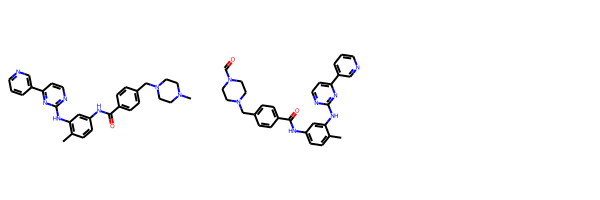

1563360 1563360 0.871428571428571


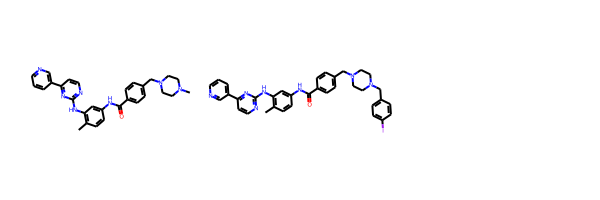

1609384 1609384 0.871428571428571


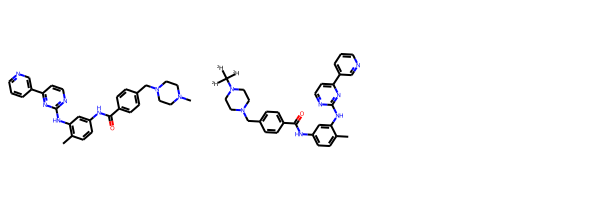

1563363 1563363 0.859154929577465


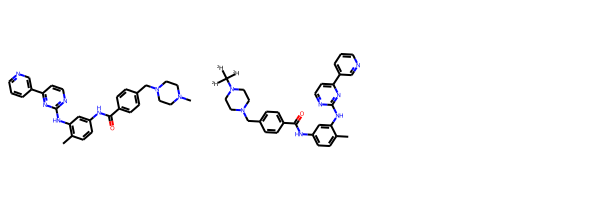

1563363 1563363 0.859154929577465


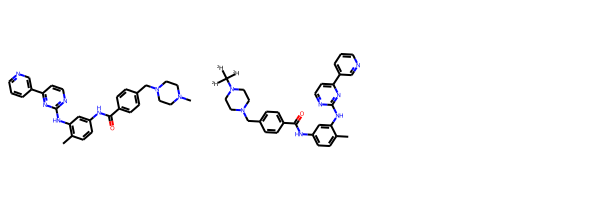

1563363 1563363 0.859154929577465


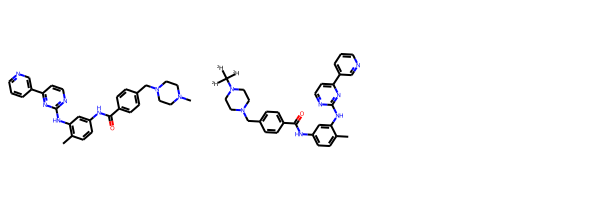

1563363 1563363 0.859154929577465


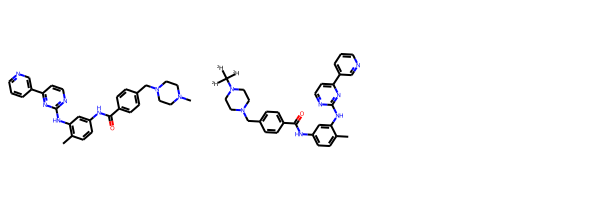

1563363 1563363 0.859154929577465


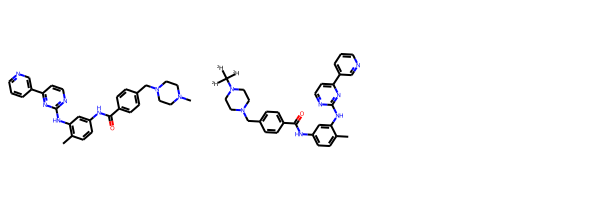

1563363 1563363 0.859154929577465


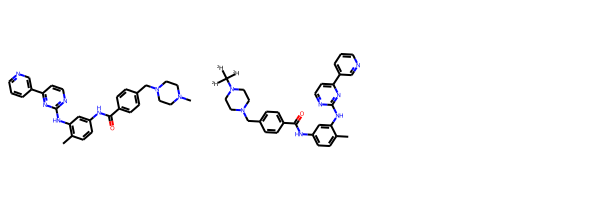

1563363 1563363 0.859154929577465


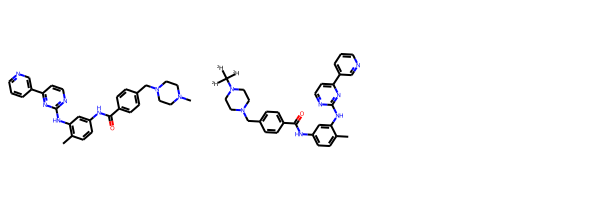

1563363 1563363 0.859154929577465


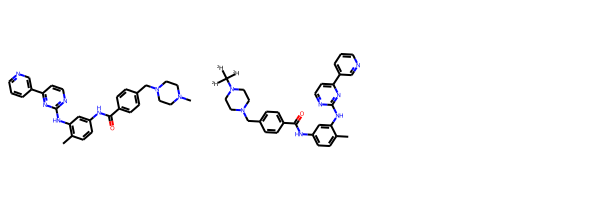

1563363 1563363 0.859154929577465


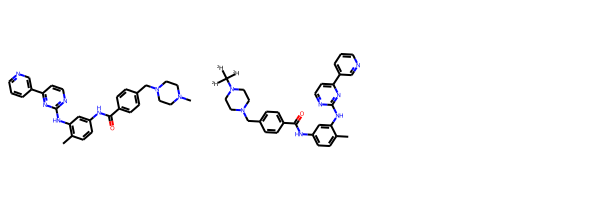

1563363 1563363 0.859154929577465


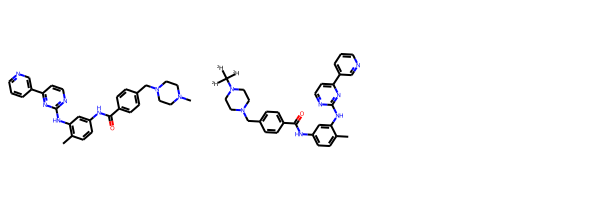

1563363 1563363 0.859154929577465


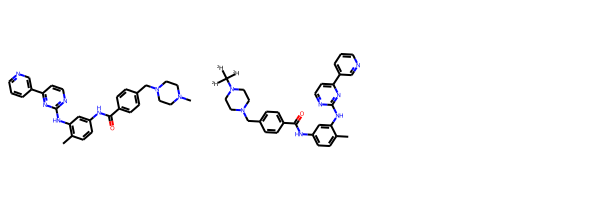

1563363 1563363 0.859154929577465


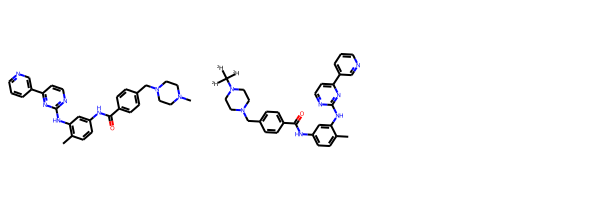

1563363 1563363 0.859154929577465


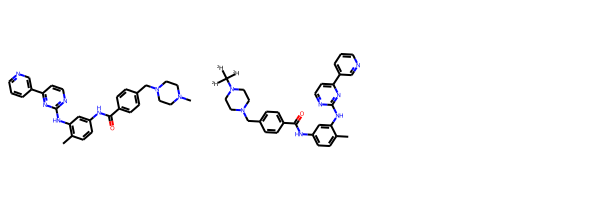

1563363 1563363 0.859154929577465


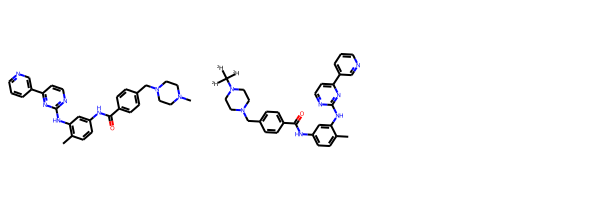

1563363 1563363 0.859154929577465


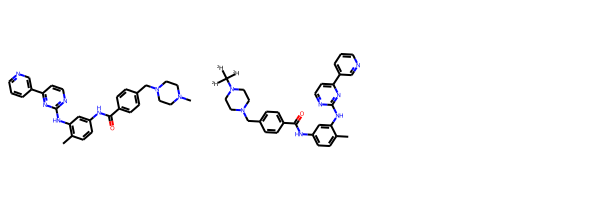

1563363 1563363 0.859154929577465


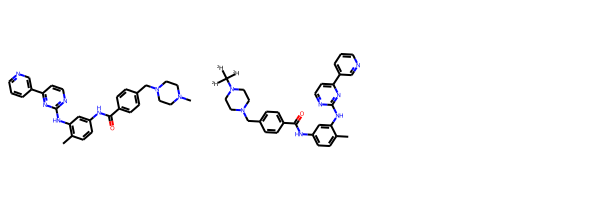

1563363 1563363 0.859154929577465


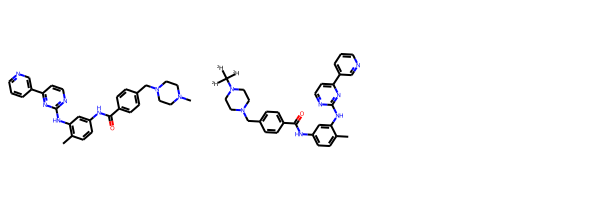

1563363 1563363 0.859154929577465


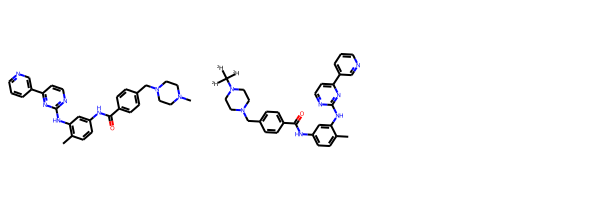

1563363 1563363 0.859154929577465


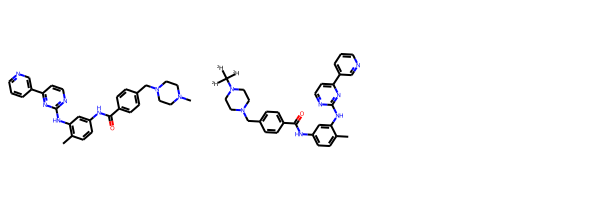

1563363 1563363 0.859154929577465


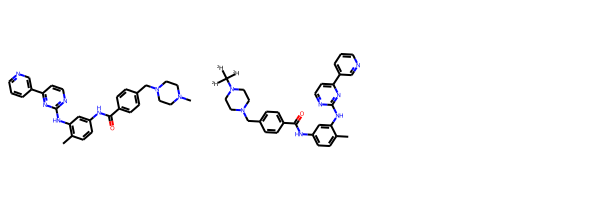

1563363 1563363 0.859154929577465


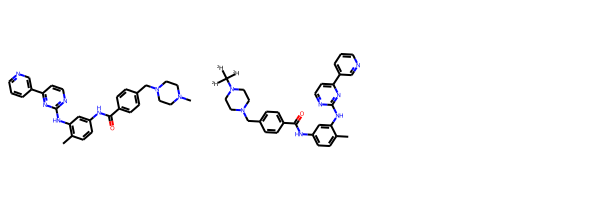

1563363 1563363 0.859154929577465


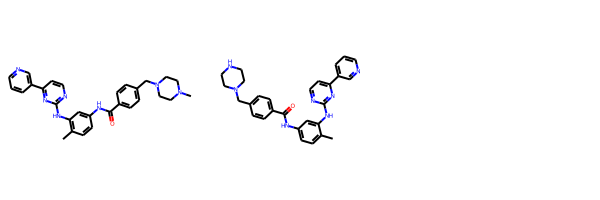

1592829 1592829 0.845070422535211


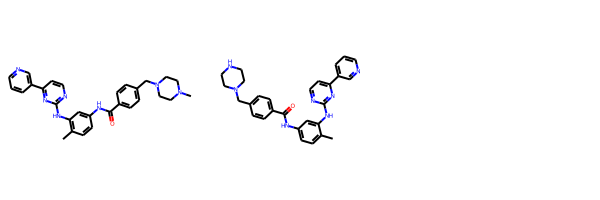

1592829 1592829 0.845070422535211


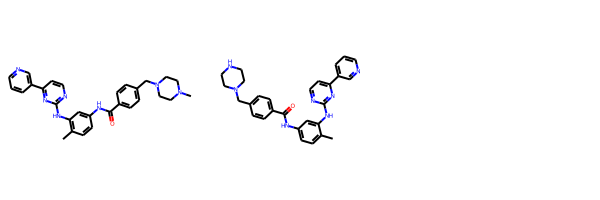

1592829 1592829 0.845070422535211


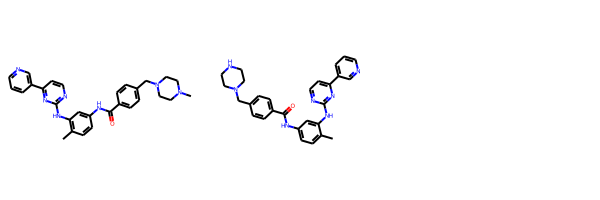

1592829 1592829 0.845070422535211


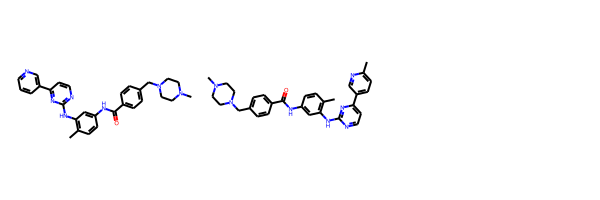

616368 616368 0.842857142857143


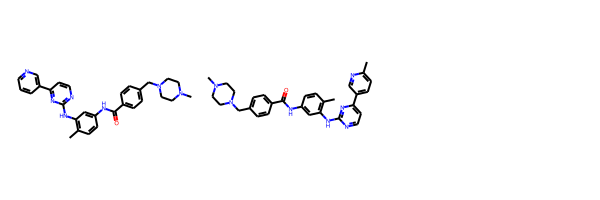

616368 616368 0.842857142857143


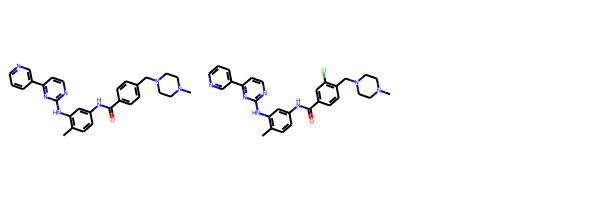

341717 341717 0.835616438356164


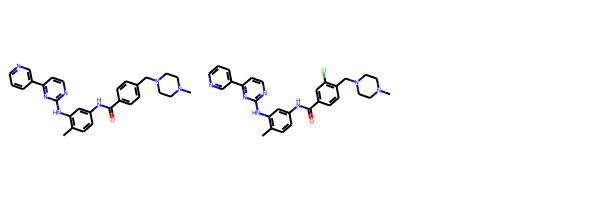

341717 341717 0.835616438356164


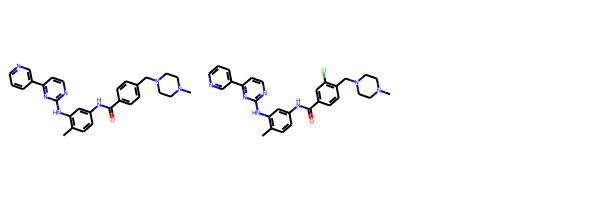

341717 341717 0.835616438356164


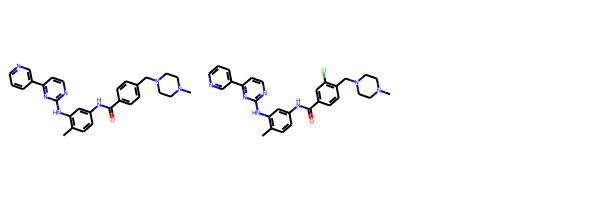

341717 341717 0.835616438356164


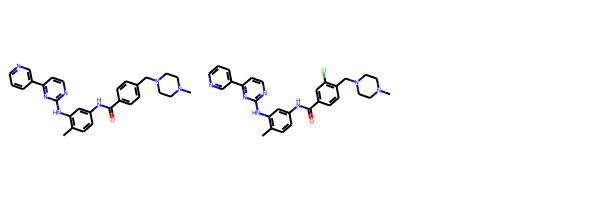

341717 341717 0.835616438356164


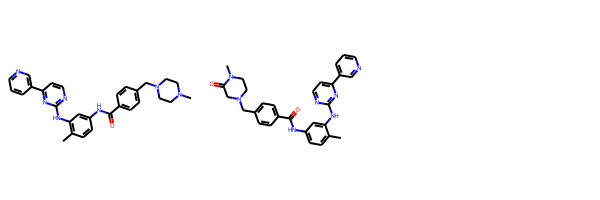

1563361 1563361 0.824324324324324


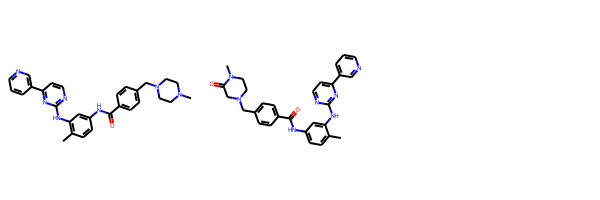

1563361 1563361 0.824324324324324


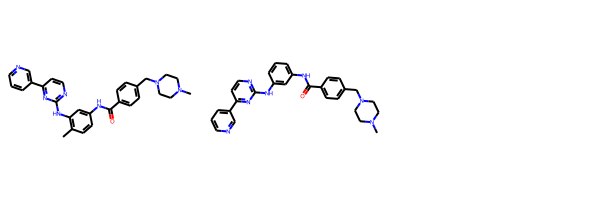

88376 88376 0.823529411764706


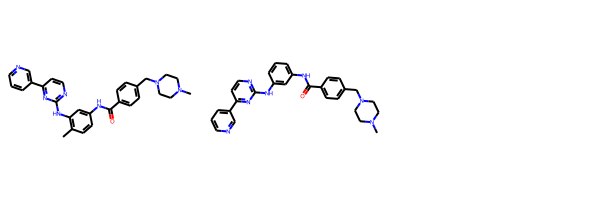

88376 88376 0.823529411764706


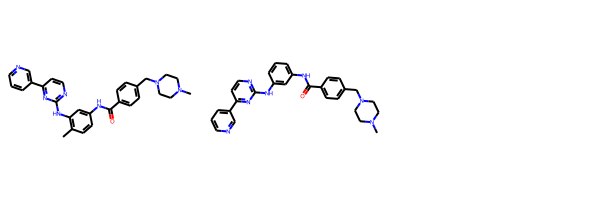

88376 88376 0.823529411764706


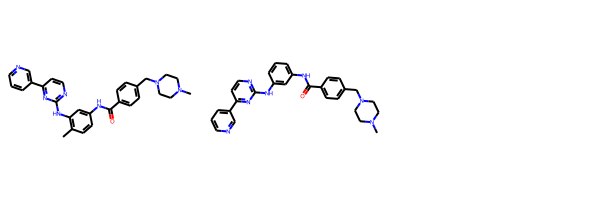

88376 88376 0.823529411764706


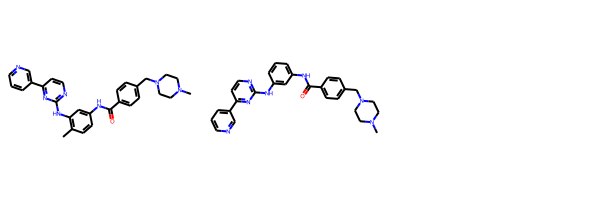

88376 88376 0.823529411764706


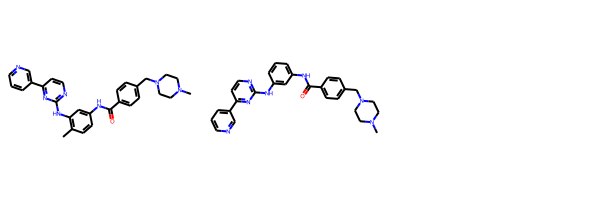

88376 88376 0.823529411764706


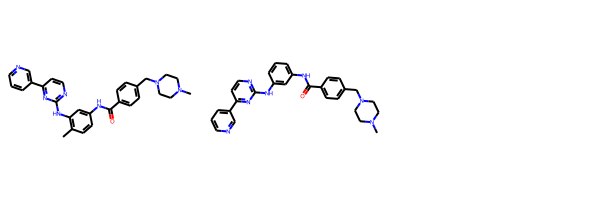

88376 88376 0.823529411764706


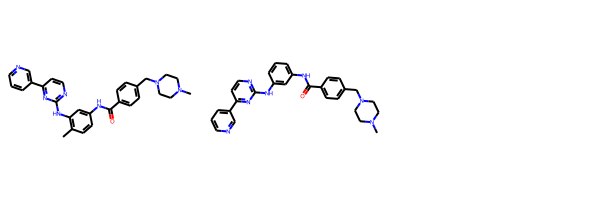

88376 88376 0.823529411764706


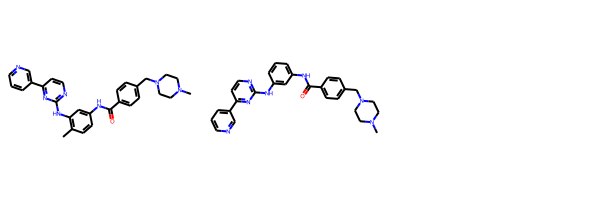

88376 88376 0.823529411764706


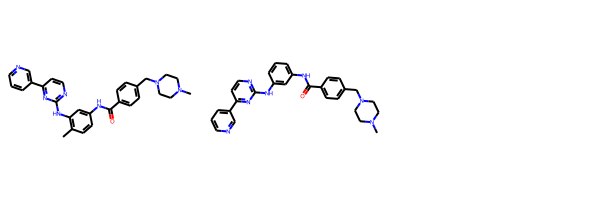

88376 88376 0.823529411764706


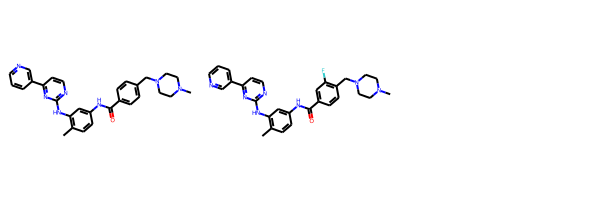

341472 341472 0.810810810810811


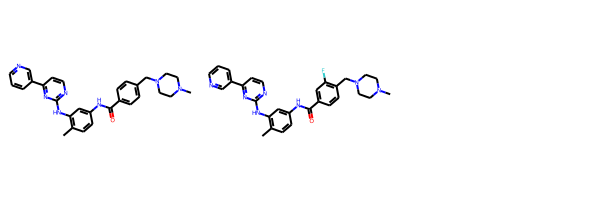

341472 341472 0.810810810810811


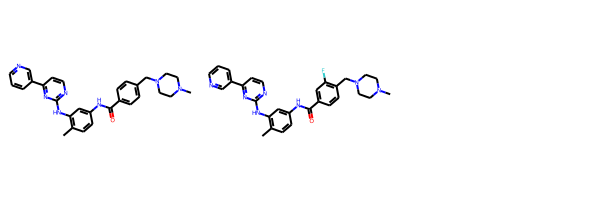

341472 341472 0.810810810810811


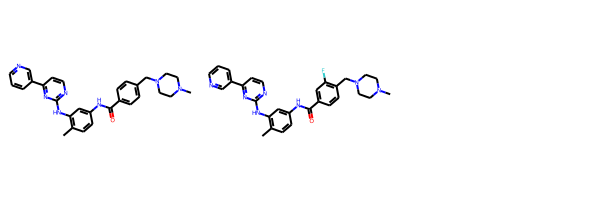

341472 341472 0.810810810810811


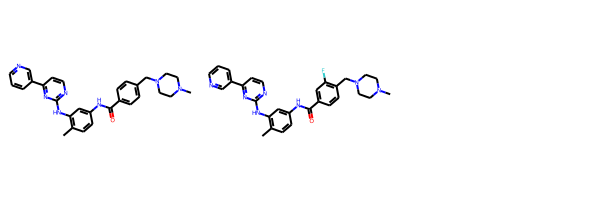

341472 341472 0.810810810810811


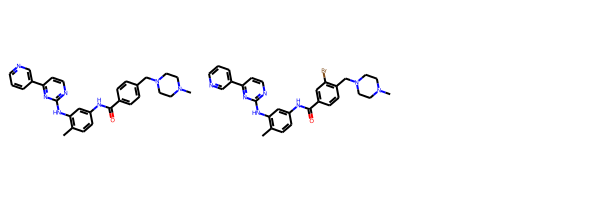

341827 341827 0.810810810810811


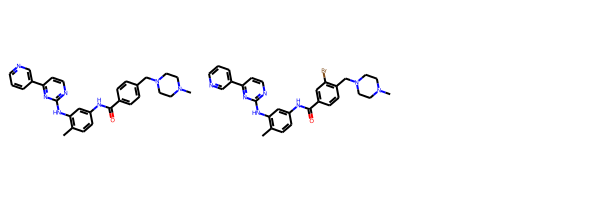

341827 341827 0.810810810810811


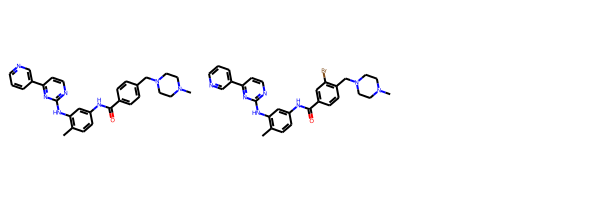

341827 341827 0.810810810810811


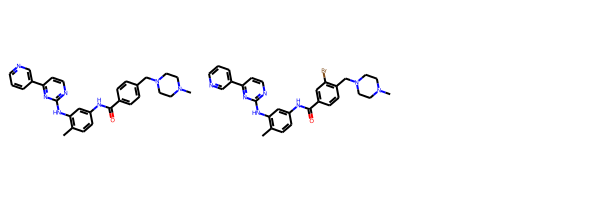

341827 341827 0.810810810810811


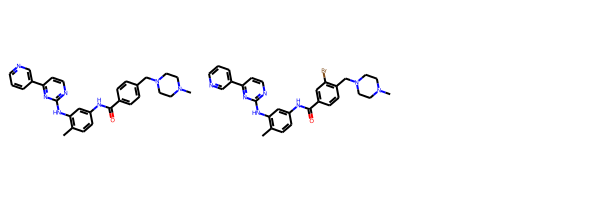

341827 341827 0.810810810810811


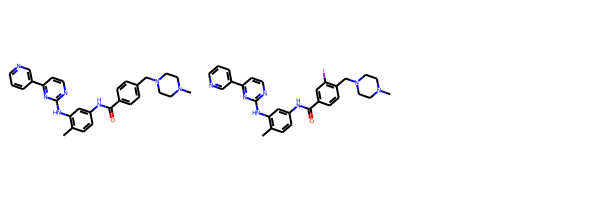

341831 341831 0.810810810810811


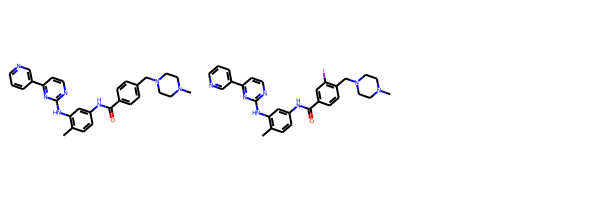

341831 341831 0.810810810810811


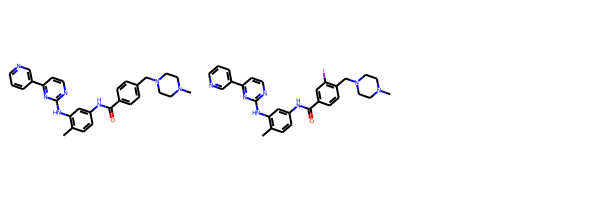

341831 341831 0.810810810810811


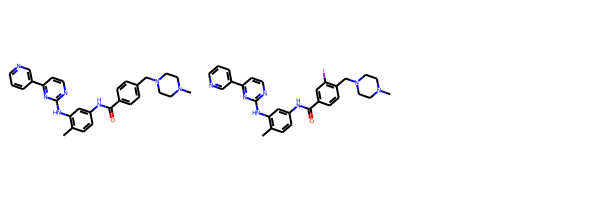

341831 341831 0.810810810810811


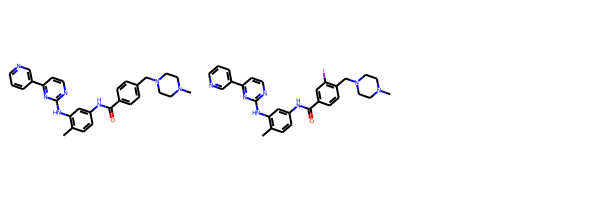

341831 341831 0.810810810810811


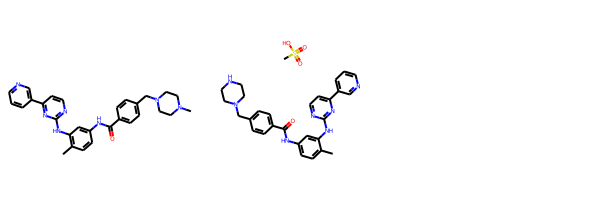

1563362 1563362 0.810810810810811


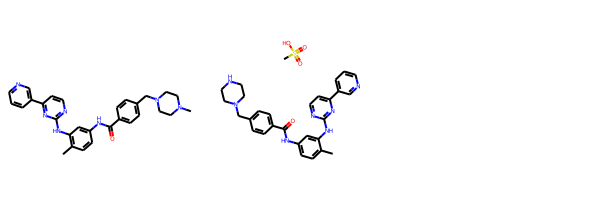

1563362 1563362 0.810810810810811


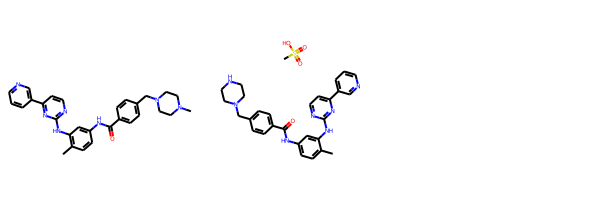

1563362 1563362 0.810810810810811


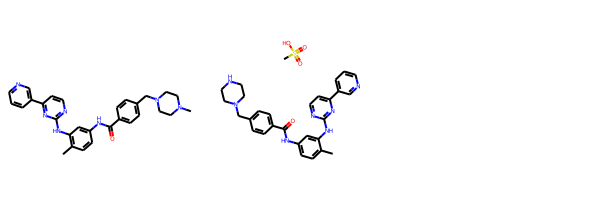

1563362 1563362 0.810810810810811


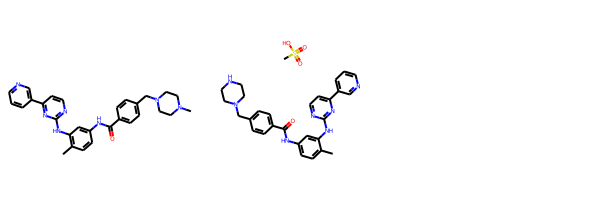

1563362 1563362 0.810810810810811


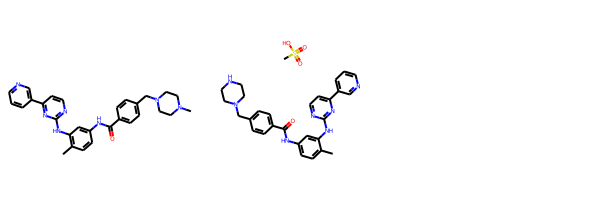

1563362 1563362 0.810810810810811


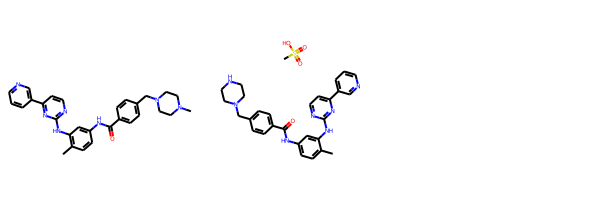

1563362 1563362 0.810810810810811


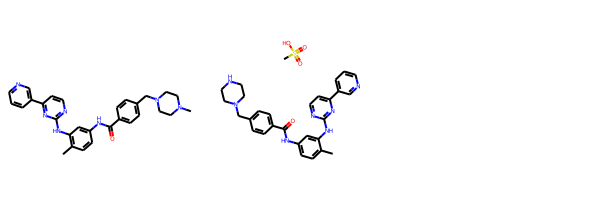

1563362 1563362 0.810810810810811


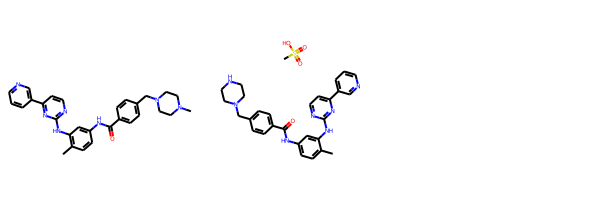

1563362 1563362 0.810810810810811


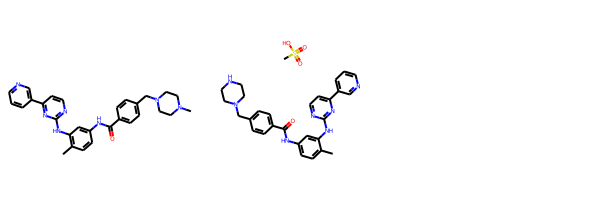

1563362 1563362 0.810810810810811


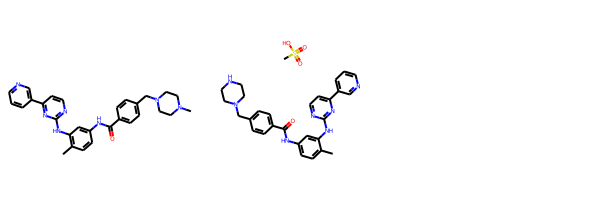

1563362 1563362 0.810810810810811


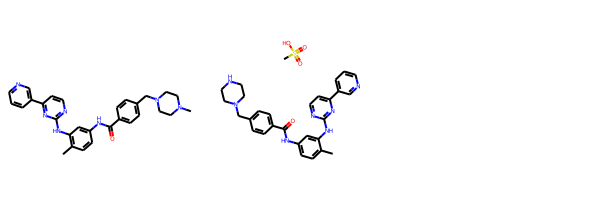

1563362 1563362 0.810810810810811


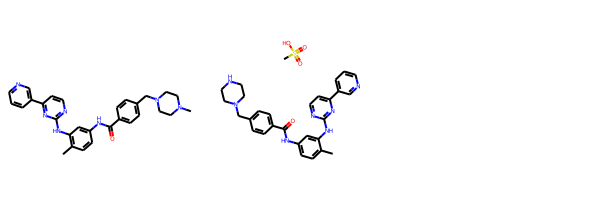

1563362 1563362 0.810810810810811


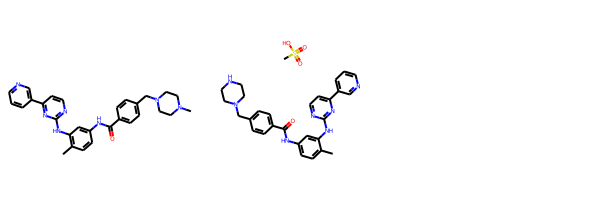

1563362 1563362 0.810810810810811


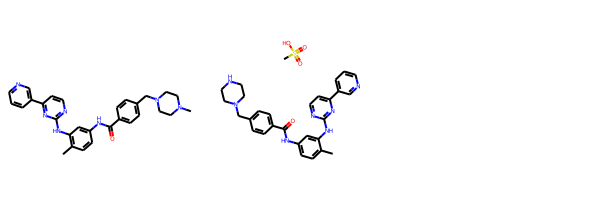

1563362 1563362 0.810810810810811


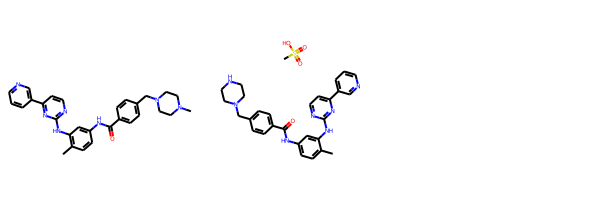

1563362 1563362 0.810810810810811


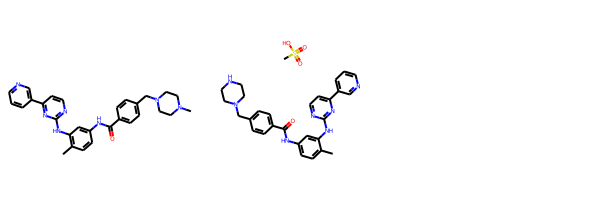

1563362 1563362 0.810810810810811


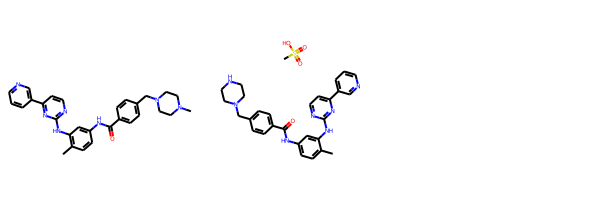

1563362 1563362 0.810810810810811


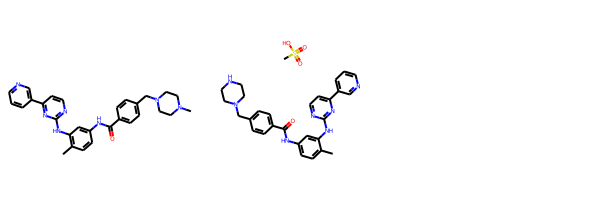

1563362 1563362 0.810810810810811


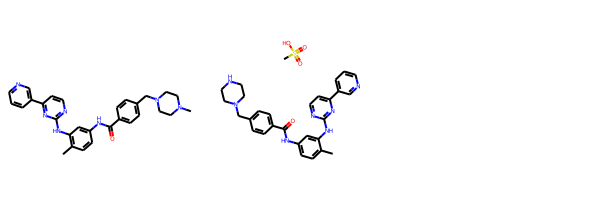

1563362 1563362 0.810810810810811


In [20]:
from IPython.display import display
for idx, row in enumerate(res):
    if row[4] < 0.9 and row[4] > 0.8:
        display(Draw.MolsToGridImage([rdk_imatinib, row[2].m]))
        print(row[2].molregno, row[3].molregno, row[4])


In [21]:
chembldb.execute('set rdkit.tanimoto_threshold=0.7')

In [22]:
tanimotosim = tanimoto_sml(Fps.mfp2, query_bv).label('similarity')

query = chembldb.query(Assay, Activity, Mols, Fps, tanimotosim).join(Activity).filter(
    Activity.molregno==Mols.molregno).filter(
    Mols.molregno==Fps.molregno)

res = query.filter(Fps.mfp2.tanimoto_sml(query_bv)).order_by(desc('similarity'))

In [23]:
from IPython.display import display
from razi.rdkit_postgresql.functions import tanimoto_sml
for row in res.limit(2000):
    if row[4] < 1:
        display(row[2].m)
        print(row[2].molregno, row[3].molregno, row[4])

In [ ]:
from pychembldb import *
for target in chembldb.query(Target).filter_by(pref_name="Tyrosine-protein kinase ABL"):
    for assay in target.assays:
        for activity in assay.activities:
            print(activity.value, activity.compound.molecule.structure.standard_inchi_key)

16.0 DGXWTUANDHNVEV-GOTSBHOMSA-N
2.9 DLNQPUNIZRZGQD-VBIHGRSYSA-N
13.5 FOSUHZNVGWOSJD-VBIHGRSYSA-N
100.0 MJXIDCYMAKGNKJ-GOTSBHOMSA-N
2.1 XYDDYEATSKZMBM-GOTSBHOMSA-N
4.0 QPFJPSMUHTYLAF-GOTSBHOMSA-N
7.0 MYZLOAXXVDGNMQ-FKBYEOEOSA-N
1.4 LVVKADMQGHJKID-FKBYEOEOSA-N
5.2 ZWUHAYMICLJFRN-PSCZMIBCSA-N
15.0 QQEKQSBIEKQXQS-PSCZMIBCSA-N
17.0 PALHYHNDIXXDKQ-GOTSBHOMSA-N
None AQNWHIVUNHYXGT-GOTSBHOMSA-N
None SKCNEXNJNGTKIO-PSCZMIBCSA-N
15.3 QQEKQSBIEKQXQS-YTQITFJLSA-N
100.0 DCEKAJDMUXCPRY-OMUPHHEWSA-N
72.0 FDTYPVJUZDXPBM-NWVWQQAFSA-N
95.9 NUFOBLSTYVVCSD-GFLPGQDNSA-N
7.4 NZEWVZPKBCYGKR-IGKWTDBASA-N
5.0 WKENBZRMFRFVRD-UIUQJESISA-N
25.7 CIABKNUIMXQZSP-MZBJOSPHSA-N
6.0 WKENBZRMFRFVRD-RNCAPKPVSA-N
26.0 ROPOWZAPSWBVGM-DKLXNKCPSA-N
46.2 FDTYPVJUZDXPBM-DKLXNKCPSA-N
None CIABKNUIMXQZSP-NYMACZPPSA-N
None SMEOXSZHMGEKRJ-NDXORKPFSA-N
None HLQIDYAWIWRCDQ-IRGGMKSGSA-N
None WXCDFLYGGRZSJW-HVTWWXFQSA-N
None NZEWVZPKBCYGKR-YGOYIFOWSA-N
None QBSKMTLPIRQMFP-MUGJNUQGSA-N
None SMEOXSZHMGEKRJ-CZAAIQMYSA-N
None DDNQOBKWMRXU

-42.0 GMIOVFWOKICUCJ-UHFFFAOYSA-N
20.0 JNAZGEGXKHNDBG-UHFFFAOYSA-N
None LSBZCOGIERJUBR-UHFFFAOYSA-N
20.0 UJNGZMPNPWMTDP-UHFFFAOYSA-N
20.0 OIGYTQZVSAHUAD-UHFFFAOYSA-N
20.0 OLQJOCFRZLUUEL-UHFFFAOYSA-N
None MGEAZGCEEMEQLI-UHFFFAOYSA-N
None GCTVEPIZCFEIEW-UHFFFAOYSA-N
None CBQIZCHRNXGJGN-UHFFFAOYSA-N
None BWPDVSFMPUAKCS-UHFFFAOYSA-N
1.3 NIMIWWQLOGNYHD-UHFFFAOYSA-N
0.5 CVFFSNDOBXFEKR-UHFFFAOYSA-N
5.0 GCEFTTIUEIKKPW-UNOMPAQXSA-N
1.0 OSJPWEILZQFNPI-UNOMPAQXSA-N
2.5 WMFFHUYJLJSDEU-XGICHPGQSA-N
20.0 KNNIVUKTSMMDLY-AQTBWJFISA-N
0.8 HOZMXIPMJIGFMB-ZROIWOOFSA-N
0.6 KAGAMCCGZCDKMX-UVTDQMKNSA-N
58.0 VSBFCRHIGBHQTI-UHFFFAOYSA-N
2.0 JYHRBJVBNRDAJX-UHFFFAOYSA-N
1.3 SLBMNZPBYUAWPO-UHFFFAOYSA-N
0.4 ISVOIGTWCBLSQY-UHFFFAOYSA-N
2.0 LZMYTXMTFJGQJA-UHFFFAOYSA-N
2.0 QOVNZWROVBIKQY-BOPFTXTBSA-N
2.0 NDWMSBYUWXNXGT-HKWRFOASSA-N
2.0 JEDKLZGNCRZYND-UHFFFAOYSA-N
2.0 AXHAJBIEOINPDH-UHFFFAOYSA-N
2.0 BVZCHEPRCHHCRQ-UHFFFAOYSA-N
0.01 QMUJWFWCDUXRJK-UHFFFAOYSA-N
0.06 CSJUXMSRJYHFAV-UHFFFAOYSA-N
0.15 USCJBUZPUNRXEU-UHFFF

3.58 RFSFIDGEFVXSQM-OUKQBFOZSA-N
626.0 IQPVVCXHSILADO-MSUUIHNZSA-N
73.3 IQPVVCXHSILADO-WUKNDPDISA-N
54.3 KIHQVERTLRHJED-MSUUIHNZSA-N
90.8 MNFIBODISIOKPO-OFTDCZQLSA-N
81.1 NDMYJXVUZZJDMO-WRJNCIKXSA-N
92.6 CDXAYERLWSEGDH-IQKMHMRTSA-N
90.7 KPFQMALAMAGQMD-RBJTVHIQSA-N
76.5 KFJODGYNYZVLPL-COKRBVQGSA-N
72.3 UYILMQKTDMIPLU-COKRBVQGSA-N
74.8 KARGNBBEUCAGEM-VNPOMFIXSA-N
82.6 HVYNAGNDGYDQLT-ZQRGOCLVSA-N
76.7 XZSDNYHHWDDDFV-SNTPLNSLSA-N
0.82 MNFIBODISIOKPO-OFTDCZQLSA-N
0.4 KARGNBBEUCAGEM-VNPOMFIXSA-N
0.29 CDXAYERLWSEGDH-IQKMHMRTSA-N
0.4 NDMYJXVUZZJDMO-WRJNCIKXSA-N
0.4 KPFQMALAMAGQMD-RBJTVHIQSA-N
0.4 KFJODGYNYZVLPL-COKRBVQGSA-N
0.4 UYILMQKTDMIPLU-COKRBVQGSA-N
1.76 HVYNAGNDGYDQLT-ZQRGOCLVSA-N
1.9 XZSDNYHHWDDDFV-SNTPLNSLSA-N
0.136 HKSZLNNOFSGOKW-FYTWVXJKSA-N
50.0 FMJRZOAMRUEUOG-UHFFFAOYSA-N
33.0 GAAHSFKFIMENOG-UHFFFAOYSA-N
8.0 HESLKTSGTIBHJU-UHFFFAOYSA-N
0.48 KLPFPTSVYVEKOL-UHFFFAOYSA-N
30.0 GCIKSSRWRFVXBI-UHFFFAOYSA-N
295.0 BLQYVHBZHAISJM-CMDGGOBGSA-N
42.0 GCIKSSRWRFVXBI-UHFFFAOYSA-N
4.0 LOLPPWBBNU

0.25 GGEDDOAPJMUBJS-UHFFFAOYSA-N
0.1 ZDVMCRNBPCIWEL-UHFFFAOYSA-N
0.3 MDRRJZBAXQKICB-UHFFFAOYSA-N
0.09 XNWHPCMDUYIUSL-UHFFFAOYSA-N
0.11 JUBQMCOOSJGKFM-UHFFFAOYSA-N
0.13 GWPZAFFIOBYFPC-UHFFFAOYSA-N
0.23 MFMNTKJASBOAKJ-UHFFFAOYSA-N
10.0 MPVGZUGXCQEXTM-UHFFFAOYSA-N
10.0 RAHBGWKEPAQNFF-UHFFFAOYSA-N
6.2 ODPGGGTTYSGTGO-UHFFFAOYSA-N
10.0 QYZOGCMHVIGURT-UHFFFAOYSA-N
3700.0 MVCOAUNKQVWQHZ-UHFFFAOYSA-N
10.0 OUSFTKFNBAZUKL-UHFFFAOYSA-N
670.0 PIQCTGMSNWUMAF-UHFFFAOYSA-N
210.0 YABJJWZLRMPFSI-UHFFFAOYSA-N
640.0 OMZCMEYTWSXEPZ-UHFFFAOYSA-N
10.0 UJLAWZDWDVHWOW-YPMHNXCESA-N
10.0 LLVZBTWPGQVVLW-SNAWJCMRSA-N
0.72 ZBNZXTGUTAYRHI-UHFFFAOYSA-N
180.0 WVUNYSQLFKLYNI-AATRIKPKSA-N
250.0 AAKJLRGGTJKAMG-UHFFFAOYSA-N
10.0 BIIVYFLTOXDAOV-YVEFUNNKSA-N
10.0 XGALLCVXEZPNRQ-UHFFFAOYSA-N
10.0 MYQAUKPBNJWPIE-UHFFFAOYSA-N
10.0 CUIHSIWYWATEQL-UHFFFAOYSA-N
8.5 KTUFNOKKBVMGRW-UHFFFAOYSA-N
820.0 KDKUVYLMPJIGKA-UHFFFAOYSA-N
10.0 BCFGMOOMADDAQU-UHFFFAOYSA-N
10.0 ZCBUQCWBWNUWSU-SFHVURJKSA-N
10.0 UXXQOJXBIDBUAC-UHFFFAOYSA-N
610.0 

50.0 DORFEDMRVQLEQT-SNVBAGLBSA-N
50.0 QACCVOJRKKIYFM-SFNBMPIDSA-N
10.0 OIOZTIQUNWLFQV-HVUAZKLTSA-N
10.0 CQWBHMMWZICZRH-UHFFFAOYSA-N
10.0 DIASEXMEBNQQHZ-UHFFFAOYSA-N
10.0 KOLSEKSFVMGHDV-UHFFFAOYSA-N
50.0 LQOLVCAWVIQPRR-UHFFFAOYSA-N
50.0 DHXKHAXDIKGJKS-UHFFFAOYSA-N
5000.0 KTUFNOKKBVMGRW-UHFFFAOYSA-N
478.0 BNIPBKFCGMYCDD-BQYQJAHWSA-N
5000.0 KTUFNOKKBVMGRW-UHFFFAOYSA-N
3.1 ZBNZXTGUTAYRHI-UHFFFAOYSA-N
1000.0 ZBNZXTGUTAYRHI-UHFFFAOYSA-N
3.0 WGVVIVGNBSSANI-UHFFFAOYSA-N
50.0 LQOLVCAWVIQPRR-UHFFFAOYSA-N
50.0 DHXKHAXDIKGJKS-UHFFFAOYSA-N
1.1 UBPYILGKFZZVDX-UHFFFAOYSA-N
25.0 BNIPBKFCGMYCDD-BQYQJAHWSA-N
38.0 HHZIURLSWUIHRB-UHFFFAOYSA-N
658.0 KTUFNOKKBVMGRW-UHFFFAOYSA-N
50.0 LQOLVCAWVIQPRR-UHFFFAOYSA-N
50.0 DHXKHAXDIKGJKS-UHFFFAOYSA-N
50.0 LQOLVCAWVIQPRR-UHFFFAOYSA-N
50.0 DHXKHAXDIKGJKS-UHFFFAOYSA-N
50.0 LQOLVCAWVIQPRR-UHFFFAOYSA-N
50.0 DHXKHAXDIKGJKS-UHFFFAOYSA-N
0.563 MZPDPRITYJNRSG-ZEQRLZLVSA-N
9.7 YDELNSXADYPQGS-BKUYFWCQSA-N
94.0 ODBJGLKPAQMCJA-UHFFFAOYSA-N
88.0 ODBJGLKPAQMCJA-UHFFFAOYSA-N
2.0 O

1.8 ONSFTNRYQCNAAD-UHFFFAOYSA-N
50.0 LQUXOZIJMPWQAA-UHFFFAOYSA-N
7.9 PJWDSDGNSMGWKJ-UHFFFAOYSA-N
17.0 YNOUNHICEHQLNM-UHFFFAOYSA-N
3.4 VMZGXVLGNHMKLW-UHFFFAOYSA-N
5.0 KKPLVYMQNDOYMQ-UHFFFAOYSA-N
50.0 UMZSNSKPDRINJC-UHFFFAOYSA-N
32.0 ZGFXAJBFDCMHTM-UHFFFAOYSA-N
50.0 UAKWDILRCZKWFX-UHFFFAOYSA-N
2.0 GZMVQSNFLJUEMM-UHFFFAOYSA-N
0.688 CMUZPNXYCOKJJJ-UHFFFAOYSA-N
1.3 CNWAVQYSQHXMCH-UHFFFAOYSA-N
50.0 NZELPIPZPVLYLT-UHFFFAOYSA-N
16.0 ILURHKUMGMVIKK-UHFFFAOYSA-N
4.5 CDJSZJDGHKEHCW-UHFFFAOYSA-N
2.6 JFJRIADKVAOEDG-UHFFFAOYSA-N
13.0 SSVLAVRFVKSIND-UHFFFAOYSA-N
11.0 HMKCVXALDWCZFL-UHFFFAOYSA-N
11.0 WDMOOFMBMGLZGY-UHFFFAOYSA-N
58.0 ZNAZTNSMMJFJLP-UHFFFAOYSA-N
3.2 WGYPOAXANMFHMT-UHFFFAOYSA-N
None UTSMKWBXJSXTKR-UHFFFAOYSA-N
None YYVUOZULIDAKRN-UHFFFAOYSA-N
None UHEYNNXOPKMSPN-UHFFFAOYSA-N
None XLCLMAZCEFJFTM-UHFFFAOYSA-N
None QZYQUDYDLUIEAI-UHFFFAOYSA-N
None OKVMRMKMAISZAE-UHFFFAOYSA-N
None YFPORDWIOKIJNS-UHFFFAOYSA-N
None IJWIFRLVNMBBGB-UHFFFAOYSA-N
None NZYYLYBHKWTPIP-UHFFFAOYSA-N
None ODWVHXIVPROZC

10.0 CEEHIKQKZBQZLL-UHFFFAOYSA-N
95.0 FHOXICOTPQTJOQ-UHFFFAOYSA-N
7.8 VLEQHZKBZRDDGS-UHFFFAOYSA-N
1.5 GDGRRDMNAXWFDD-UHFFFAOYSA-N
10.0 GEPFRYBSYYISHE-UHFFFAOYSA-N
82.0 BIUBEDNJWSICKA-UHFFFAOYSA-N
73.0 FHOXICOTPQTJOQ-UHFFFAOYSA-N
99.0 FHOXICOTPQTJOQ-UHFFFAOYSA-N
65.0 CABVNJHMFKAWPR-NHCUHLMSSA-N
65.0 CDTMQKLFPXZZMW-FYYLOGMGSA-N
65.0 CABVNJHMFKAWPR-NHCUHLMSSA-N
65.0 CDTMQKLFPXZZMW-FYYLOGMGSA-N
7800.0 JGEBLDKNWBUGRZ-HXUWFJFHSA-N
12.0 LAGCJVRAJGEPRK-UHFFFAOYSA-N
37.0 QCULELDGBILSCQ-UHFFFAOYSA-N
40.0 JMMDGNCPOJCTCM-UHFFFAOYSA-N
28.0 ATHHKEPKTYFCLO-UHFFFAOYSA-N
44.0 OJXOPUDECZOBCC-UHFFFAOYSA-N
55.0 BARUTPKRZGRWAT-UHFFFAOYSA-N
86.0 PYGBBCZUPYJSMB-UHFFFAOYSA-N
63.0 MAVBWEKXVQTINK-UHFFFAOYSA-N
14.0 OUXBRIMSVZRMFZ-UHFFFAOYSA-N
61.0 VHLUXDYMEAMWIZ-UHFFFAOYSA-N
7.0 SNZUPQVEOODGTH-UHFFFAOYSA-N
0.0 OWALSAZNQGXOKT-UHFFFAOYSA-N
18.0 ADHMBWGFAGEFML-UHFFFAOYSA-N
24.0 OQXWVOKSKFTGRB-UHFFFAOYSA-N
0.0 DOQRNKSBGOERSZ-UHFFFAOYSA-N
26.0 VOYMXHNIRCKCCP-UHFFFAOYSA-N
27.0 PEGFWUIVFWUTDF-UHFFFAOYSA-N
53.0 OJSNHNQI

None WHJOZRMJWLTPQY-UHFFFAOYSA-N
None RJZRAQCJBYKZLL-UHFFFAOYSA-N
None CGISEMWDKJPLDM-UHFFFAOYSA-N
None IQQUFFPEUPNLMU-UHFFFAOYSA-N
None VPJZOWPTJIQVFR-UHFFFAOYSA-N
None MHAGHCPUCHCZCI-UHFFFAOYSA-N
None PUODFDJQSRNOAD-UHFFFAOYSA-N
None IKUYMZYSYNRCNU-UHFFFAOYSA-N
None BSCRCERSQIXKHN-UHFFFAOYSA-N
None XQIRXIVNJKLTQZ-UHFFFAOYSA-N
None DJGFXKQXYXBLCL-UHFFFAOYSA-N
None OUSGYRCDSMTCJQ-UHFFFAOYSA-N
None LSRJXNZHEBBALZ-UHFFFAOYSA-N
None HFGHDBBXVPOUGP-UHFFFAOYSA-N
None SZJWYBPBTDZJPY-UHFFFAOYSA-N
None FAAZDSIZLKQOTO-CQSZACIVSA-N
None VSCHWERMNFVTIX-CQSZACIVSA-N
None XYXYTCAMNSWEAW-UHFFFAOYSA-N
None GLGHZCWUFGPMDK-UHFFFAOYSA-N
None YGSAZOCXJDIJLN-UHFFFAOYSA-N
None OOJCXKRYYHGMOA-UHFFFAOYSA-N
None ZWJABXBGZUCAAB-UHFFFAOYSA-N
None PJHRRMICMJBPRK-UHFFFAOYSA-N
None NTTSBRQVYORONV-UHFFFAOYSA-N
None TZIOCZDXIULNII-UHFFFAOYSA-N
None KFCRTTVBDHATAJ-UHFFFAOYSA-N
None AAKJLRGGTJKAMG-UHFFFAOYSA-N
30.0 SIUIQMQVKUUQQF-UHFFFAOYSA-N
41.0 MVCOAUNKQVWQHZ-UHFFFAOYSA-N
90.0 HGSNUBHWAMMKIR-JOCHJYFZSA-N
10.0 HGBZK

42.89 HRLCKXAUZJCJAZ-FZSIALSZSA-N
7.47 UKFXNDDYHAHTEM-UHFFFAOYSA-N
3.16 KKMQKOWAGAPQDL-UHFFFAOYSA-N
2.12 BARYYLFEOIUPEY-UHFFFAOYSA-N
4.03 NAHPEMQMXDXGBZ-UHFFFAOYSA-N
-0.05 UBABNUZHWFXYNS-UHFFFAOYSA-N
4.15 HZJPBOLTWHOKEL-UHFFFAOYSA-N
1.89 ACQZMAJVOPRMQJ-UHFFFAOYSA-N
39.53 DOYSAAFZVDAQAN-UHFFFAOYSA-N
1.48 ZRWNCIWVANTRGL-UHFFFAOYSA-N
9.08 TZPMELZXMICXNO-VOTSOKGWSA-N
93.57 OSKOUNNDHHFTQP-UHFFFAOYSA-N
3.02 RLKIXFRFDGFKOP-UHFFFAOYSA-N
1.78 ATTRJLKUPUIICC-UHFFFAOYSA-N
4.32 XWMDWGDDWKLDEH-UHFFFAOYSA-N
1.53 KFWBJWDHALYVMK-UHFFFAOYSA-N
3.37 JVXFJMXCRSAZFH-UHFFFAOYSA-N
37.44 VNVKSDCWJDOWNE-UHFFFAOYSA-N
15.28 UNNVAVXBYOPNHR-UHFFFAOYSA-N
3.47 ODLNBFNBEPOFNC-UHFFFAOYSA-N
44.6 DOKIBWCVABZHOH-UHFFFAOYSA-N
-0.12 NQQBKOGAKSBCSI-UHFFFAOYSA-N
3.23 ZZTJLVZEYMOZSD-UHFFFAOYSA-N
-0.05 IZHQZRNVMNTCAO-UHFFFAOYSA-N
-1.14 PGONBMCLDBGMIY-UHFFFAOYSA-N
4.03 QRODFHXJGMZHTM-UHFFFAOYSA-N
3.86 WFQYBHCSVMMJEF-UHFFFAOYSA-N
11.52 FXJZPZMEETZHRB-UHFFFAOYSA-N
2.13 LOQFPSAYBYTGOA-UHFFFAOYSA-N
0.52 CTCKXCOHXZAARD-UHFFFAOYSA-N


5.19 ACQZMAJVOPRMQJ-UHFFFAOYSA-N
37.93 DOYSAAFZVDAQAN-UHFFFAOYSA-N
3.45 ZRWNCIWVANTRGL-UHFFFAOYSA-N
7.59 TZPMELZXMICXNO-VOTSOKGWSA-N
94.72 OSKOUNNDHHFTQP-UHFFFAOYSA-N
3.02 RLKIXFRFDGFKOP-UHFFFAOYSA-N
1.16 ATTRJLKUPUIICC-UHFFFAOYSA-N
6.77 XWMDWGDDWKLDEH-UHFFFAOYSA-N
2.64 KFWBJWDHALYVMK-UHFFFAOYSA-N
7.52 JVXFJMXCRSAZFH-UHFFFAOYSA-N
38.46 VNVKSDCWJDOWNE-UHFFFAOYSA-N
20.23 UNNVAVXBYOPNHR-UHFFFAOYSA-N
3.48 ODLNBFNBEPOFNC-UHFFFAOYSA-N
34.45 DOKIBWCVABZHOH-UHFFFAOYSA-N
3.89 NQQBKOGAKSBCSI-UHFFFAOYSA-N
4.05 ZZTJLVZEYMOZSD-UHFFFAOYSA-N
-0.27 IZHQZRNVMNTCAO-UHFFFAOYSA-N
3.3 PGONBMCLDBGMIY-UHFFFAOYSA-N
5.82 QRODFHXJGMZHTM-UHFFFAOYSA-N
4.37 WFQYBHCSVMMJEF-UHFFFAOYSA-N
11.27 FXJZPZMEETZHRB-UHFFFAOYSA-N
4.09 LOQFPSAYBYTGOA-UHFFFAOYSA-N
2.21 CTCKXCOHXZAARD-UHFFFAOYSA-N
10.69 UHCHLTQBLNUYRT-GFCCVEGCSA-N
76.51 QZFLQLMWGKMMGY-UHFFFAOYSA-N
19.49 UJVHDGDGHUBCNG-UHFFFAOYSA-N
2.47 JDDSPCRIJZRHBB-UHFFFAOYSA-N
4.04 SMQZLZAGBDDASN-ZHEQYFEDSA-N
2.98 SAWLOYCVNOMZOQ-OAQYLSRUSA-N
3.37 LOKKVFGDJAVMLU-UHFFFAOYSA-N
5

61.63 ASFADYMEYHSSND-UHFFFAOYSA-N
4.98 DOJXCIZDAFPMQV-UHFFFAOYSA-N
22.51 BSHCILRNXWKQAL-UHFFFAOYSA-N
-0.3 XDQUYQKTDSDQRL-UHFFFAOYSA-N
24.16 QTHDVKCBIJCECK-UHFFFAOYSA-N
43.91 NXNQLECPAXXYTR-UHFFFAOYSA-N
1.83 OHBDLKLACOYJNL-UHFFFAOYSA-N
4.57 WFOPNLUSQIIBIX-UHFFFAOYSA-N
2.56 DUZCSXXJVYCEKF-UHFFFAOYSA-N
32.46 OIPORLPSIAFDJE-UHFFFAOYSA-N
-0.07 YEIAMNOHYKXSFB-FPOVZHCZSA-N
18.85 CKZWKYHFXVABMB-UHFFFAOYSA-N
21.17 CFMHJOOAJUEZAN-UHFFFAOYSA-N
1.03 KODFUVBIVXFWPF-UHFFFAOYSA-N
-0.14 GMCZGAWPMLORCQ-UHFFFAOYSA-N
44.56 HKPBZPKKYDOKSE-UHFFFAOYSA-N
1.15 BBGZUGGIEIYPCN-UHFFFAOYSA-N
4.09 BUAIGJRXIAKFCN-UHFFFAOYSA-N
40.29 XSJMSGALWUODPK-UHFFFAOYSA-N
10.4 UMRCHWHZJBYWLH-UHFFFAOYSA-N
-0.02 ONINFKOEYCCERZ-UHFFFAOYSA-N
63.53 ZOTNSCLLJKXGSD-UHFFFAOYSA-N
12.11 GVSGFNAEUPRUIM-UHFFFAOYSA-N
0.44 VMRIQAPFNJVYQI-UHFFFAOYSA-N
4.99 YWGGNXADJYGMJY-UHFFFAOYSA-N
2.07 LBPKYPYHDKKRFS-UHFFFAOYSA-N
26.55 GVYKLTFFLMMUEN-UHFFFAOYSA-N
12.57 FIFYQOXBCARPBQ-UHFFFAOYSA-N
31.29 OEYVBXJCSSKWJW-UHFFFAOYSA-N
1.37 CKYDKNBLVBVPCS-UHFFFA

71.94 ASFADYMEYHSSND-UHFFFAOYSA-N
10.98 DOJXCIZDAFPMQV-UHFFFAOYSA-N
10.72 BSHCILRNXWKQAL-UHFFFAOYSA-N
3.89 XDQUYQKTDSDQRL-UHFFFAOYSA-N
53.08 QTHDVKCBIJCECK-UHFFFAOYSA-N
44.7 NXNQLECPAXXYTR-UHFFFAOYSA-N
4.6 OHBDLKLACOYJNL-UHFFFAOYSA-N
10.35 WFOPNLUSQIIBIX-UHFFFAOYSA-N
6.95 DUZCSXXJVYCEKF-UHFFFAOYSA-N
30.43 OIPORLPSIAFDJE-UHFFFAOYSA-N
6.2 YEIAMNOHYKXSFB-FPOVZHCZSA-N
57.98 CKZWKYHFXVABMB-UHFFFAOYSA-N
19.33 CFMHJOOAJUEZAN-UHFFFAOYSA-N
3.99 KODFUVBIVXFWPF-UHFFFAOYSA-N
7.3 GMCZGAWPMLORCQ-UHFFFAOYSA-N
19.04 HKPBZPKKYDOKSE-UHFFFAOYSA-N
9.87 BBGZUGGIEIYPCN-UHFFFAOYSA-N
9.29 BUAIGJRXIAKFCN-UHFFFAOYSA-N
62.72 XSJMSGALWUODPK-UHFFFAOYSA-N
20.59 UMRCHWHZJBYWLH-UHFFFAOYSA-N
4.24 ONINFKOEYCCERZ-UHFFFAOYSA-N
63.34 ZOTNSCLLJKXGSD-UHFFFAOYSA-N
8.87 GVSGFNAEUPRUIM-UHFFFAOYSA-N
45.55 VMRIQAPFNJVYQI-UHFFFAOYSA-N
7.99 YWGGNXADJYGMJY-UHFFFAOYSA-N
37.19 LBPKYPYHDKKRFS-UHFFFAOYSA-N
24.15 GVYKLTFFLMMUEN-UHFFFAOYSA-N
24.56 FIFYQOXBCARPBQ-UHFFFAOYSA-N
11.26 OEYVBXJCSSKWJW-UHFFFAOYSA-N
18.74 CKYDKNBLVBVPCS-UHFFFAOY

5.4 BBXIECANPYCIMM-UHFFFAOYSA-N
6.2 JCFJQIHDZHHMQT-UHFFFAOYSA-N
6.2 KAKGFGCTONHQJW-UHFFFAOYSA-N
8.6 XOOAAYRIVATZNM-UHFFFAOYSA-N
5.6 GKODJBVKKLQMEY-UHFFFAOYSA-N
6.2 XBAIEEJJCJHBDL-UHFFFAOYSA-N
8.4 VKBFHTIUXUCYRQ-UHFFFAOYSA-N
6.2 AGYRJOAGMDIFKL-UHFFFAOYSA-N
7.5 UHTHHESEBZOYNR-UHFFFAOYSA-N
7.1 KTEIFNKAUNYNJU-UHFFFAOYSA-N
6.2 FDBPGAHVEGEARY-UHFFFAOYSA-N
6.2 FAIHBCXQSBIRIL-UHFFFAOYSA-N
6.5 CUIHSIWYWATEQL-UHFFFAOYSA-N
6.2 RQJIDUOCLNMUHR-UHFFFAOYSA-N
6.2 GXJSLIOOPZRPEV-UHFFFAOYSA-N
6.2 DWTNLZZEPSCAIH-UHFFFAOYSA-N
5.6 WDKDZAISMRAXQL-UHFFFAOYSA-N
6.2 GQGMUKOYILWOIQ-UHFFFAOYSA-N
6.2 CNWMKSDNKYKWRI-UHFFFAOYSA-N
5.6 OUHZERPTTDHQIV-UHFFFAOYSA-N
6.2 WLLUQXGGNFUQGM-UHFFFAOYSA-N
6.2 MGNQNQOSSLCUFP-UHFFFAOYSA-N
4.2 SVDMUWJUTICXSY-UHFFFAOYSA-N
4.6 NUJBDRXQVQPKQC-UHFFFAOYSA-N
6.6 LGHBDVLAHHANMX-UHFFFAOYSA-N
6.2 OTQSCDWPCPZRIU-UHFFFAOYSA-N
5.8 YCOYDOIWSSHVCK-UHFFFAOYSA-N
6.2 DJOJKIGNNDWGRS-UHFFFAOYSA-N
6.2 NSHLUNUGZXJUID-UHFFFAOYSA-N
7.3 KTUFNOKKBVMGRW-UHFFFAOYSA-N
4.2 HQOCNFJGTTWKHC-UHFFFAOYSA-N
7.3 ZLVO

6.2 NGOGFTYYXHNFQH-UHFFFAOYSA-N
6.2 VLEFVPMCVJDTHZ-UHFFFAOYSA-N
6.3 HRZOUBQYVUXBNS-UHFFFAOYSA-N
6.3 JNXJKTXDSPWNRP-UHFFFAOYSA-N
5.8 RFVBRKXQYUDGIO-UHFFFAOYSA-N
6.2 SYSUZXPGQXEWCZ-UHFFFAOYSA-N
6.2 FYYNFIZWOMBUTO-UHFFFAOYSA-N
4.6 NQWXPDWPIHDISD-UHFFFAOYSA-N
6.2 HZPACYSNLOCDLW-UHFFFAOYSA-N
6.5 RKLGMDOZEOTQEM-UHFFFAOYSA-N
6.2 XLXFTYZLDQSWSY-UHFFFAOYSA-N
6.9 FLEAYYMORDPWAJ-UHFFFAOYSA-N
5.8 MIKAKZKNMYZLDX-UHFFFAOYSA-N
5.6 JPCWMTOYDYYXLS-UHFFFAOYSA-N
7.3 SDBOIBYRBWPIEL-UHFFFAOYSA-N
6.3 SEVCBWKJSOLMNQ-UHFFFAOYSA-N
5.1 QNLMLEYLZSGBHP-UHFFFAOYSA-N
5.9 ZZIXCHIEESZZDI-UHFFFAOYSA-N
6.2 SKLNUYVBOFIJAT-UHFFFAOYSA-N
6.2 BDPBZUHWAVABDM-UHFFFAOYSA-N
6.2 VVQQRUZZQQSDEI-UHFFFAOYSA-N
5.6 VNDWQCSOSCCWIP-UHFFFAOYSA-N
6.2 YRVHWCZERXVDLL-UHFFFAOYSA-N
5.6 SJLQDZDKTVBBLP-UHFFFAOYSA-N
7.9 UQNNJYLAPYGZBD-UHFFFAOYSA-N
6.2 ZRTWUBWXIGHVET-UHFFFAOYSA-N
5.8 NOBMKUVHFRVBES-UHFFFAOYSA-N
6.6 RYAVJHIPOWNWDE-UHFFFAOYSA-N
6.2 BHGSKYNWCFIOHP-UHFFFAOYSA-N
6.2 IMMZLRQJNZSTTE-UHFFFAOYSA-N
6.2 UAQJVFADAYIBGC-UHFFFAOYSA-N
6.0 ATGV

6.2 HOBMVEVXDIOMDM-UHFFFAOYSA-N
6.2 JCZBWICLNFNCMR-UHFFFAOYSA-N
6.2 QVWKRMXAYICTFS-UHFFFAOYSA-N
6.2 PTSWSUSIGQQZOO-UHFFFAOYSA-N
6.2 NPJROAJIXPVMTE-UHFFFAOYSA-N
6.2 VIOYJEOXCCYVDO-UHFFFAOYSA-N
6.2 WNMXOXGXHRHBLO-UHFFFAOYSA-N
6.2 IZAVTOABECKIDH-UHFFFAOYSA-N
7.5 CQBBMNXXVMOFCA-UHFFFAOYSA-N
6.2 SBFPHSVZEXSHTL-UHFFFAOYSA-N
6.8 QQUXFYAWXPMDOE-UHFFFAOYSA-N
8.0 KOHNRDPXFDZZJF-UHFFFAOYSA-N
5.6 WONUEZVTDVQBDC-UHFFFAOYSA-N
6.2 GWJHMRBQEUHFOC-UHFFFAOYSA-N
6.2 XAHJIRNRDAKTEF-UHFFFAOYSA-N
5.6 PIMQWRZWLQKKBJ-UHFFFAOYSA-N
5.6 JQAOLPKLHNHEJX-UHFFFAOYSA-N
5.6 YGKFZWJWKPZPQM-UHFFFAOYSA-N
6.2 SVUIYNKSDCANAY-UHFFFAOYSA-N
6.2 BQWACEUCYSZDBQ-UHFFFAOYSA-N
5.4 VEZQCXWMPWTPJL-UHFFFAOYSA-N
6.2 SRROIPFGGDHJCJ-UHFFFAOYSA-N
4.6 HXESDBWWDYJEJQ-UHFFFAOYSA-N
6.3 SYVFMRBHXSGATD-UHFFFAOYSA-N
5.8 UGUZOLHBLLTLBA-UHFFFAOYSA-N
5.6 OFGKHGRQQKNHAV-UHFFFAOYSA-N
6.2 XUGXUDSTKPTWNB-UHFFFAOYSA-N
5.4 KYJVTVJLGYDBGQ-UHFFFAOYSA-N
6.2 WVPSKSLAZQPAKQ-UHFFFAOYSA-N
5.6 IYOZTVGMEWJPKR-UHFFFAOYSA-N
6.2 RRUJKDOVAZSBLK-UHFFFAOYSA-N
6.3 NSKF

68.0 RDTDWGQDFJPTPD-UHFFFAOYSA-N
108.0 QMGUOJYZJKLOLH-UHFFFAOYSA-N
93.0 DNOKYISWMVFYFA-UHFFFAOYSA-N
61.0 FNZTULJDGIXMJJ-UHFFFAOYSA-N
110.0 YIECEZWWJSWRJN-MYYYXRDXSA-N
103.0 SRLVNYDXMUGOFI-YWEYNIOJSA-N
23.0 XPLJEFSRINKZLC-ATVHPVEESA-N
96.0 QNOXYUNHIGOWNY-UHFFFAOYSA-N
18.0 HKSZLNNOFSGOKW-FYTWVXJKSA-N
95.0 RJVLFQBBRSMWHX-DHUJRADRSA-N
44.0 KDKUVYLMPJIGKA-UHFFFAOYSA-N
98.0 NMFKDDRQSNVETB-UHFFFAOYSA-N
113.0 IYOZTVGMEWJPKR-IJLUTSLNSA-N
77.0 LOGJQOUIVKBFGH-YBEGLDIGSA-N
110.0 ODYAQBDIXCVKAE-UHFFFAOYSA-N
112.0 VXPWQNBKEIVYIS-UHFFFAOYSA-N
89.0 CDMGBJANTYXAIV-UHFFFAOYSA-N
99.0 XRKYMMUGXMWDAO-UHFFFAOYSA-N
49.0 FQCPPVRJPILDIK-UHFFFAOYSA-N
97.0 KFAKESMKRPNZTM-UHFFFAOYSA-N
64.0 XVECMUKVOMUNLE-UHFFFAOYSA-N
54.0 JYCUVOXSZBECAY-UHFFFAOYSA-N
103.0 KQMPRSZTUSSXND-UHFFFAOYSA-N
108.0 FNKVMIBWGQCPFN-UHFFFAOYSA-N
110.0 NGOGFTYYXHNFQH-UHFFFAOYSA-N
109.0 HLCDNLNLQNYZTK-UHFFFAOYSA-N
104.0 DOEWDSDBFRHVAP-KRXBUXKQSA-N
99.0 HFPLHASLIOXVGS-UHFFFAOYSA-N
81.0 QMBDONCHHMIWFJ-UHFFFAOYSA-N
80.0 WXUJAQBSBZLVEV-UHFFFAOYSA-N

0.17 ZBNZXTGUTAYRHI-UHFFFAOYSA-N
29.9 HHZIURLSWUIHRB-UHFFFAOYSA-N
749.6 KTUFNOKKBVMGRW-UHFFFAOYSA-N
3.26 VVUAISPVTHIENZ-UHFFFAOYSA-N
1.06 UPKSXVLHHYRHGK-UHFFFAOYSA-N
52.6 MEIGAGGFRISEMW-UHFFFAOYSA-N
5.15 PJUBIESWUWVCHJ-UHFFFAOYSA-N
2.57 ZCVSFAMUZKLEDA-UHFFFAOYSA-N
1.15 UMYCRRLKKNLFAJ-UHFFFAOYSA-N
0.54 DPKVKUFCPDBWMD-UHFFFAOYSA-N
0.77 QZIPFXBDHNETBC-UHFFFAOYSA-N
4.44 IVHGBCHHMXTINX-UHFFFAOYSA-N
1.28 MLJBVAHRZATRDE-UHFFFAOYSA-N
0.17 PZVUMQCERICNEV-UHFFFAOYSA-N
0.35 TZKBVRDEOITLRB-UHFFFAOYSA-N
0.41 PHXJVRSECIGDHY-UHFFFAOYSA-N
0.22 ZBNZXTGUTAYRHI-UHFFFAOYSA-N
12.8 HHZIURLSWUIHRB-UHFFFAOYSA-N
114.3 KTUFNOKKBVMGRW-UHFFFAOYSA-N
1.33 VVUAISPVTHIENZ-UHFFFAOYSA-N
0.76 UPKSXVLHHYRHGK-UHFFFAOYSA-N
20.1 MEIGAGGFRISEMW-UHFFFAOYSA-N
4.28 PJUBIESWUWVCHJ-UHFFFAOYSA-N
2.06 ZCVSFAMUZKLEDA-UHFFFAOYSA-N
0.93 UMYCRRLKKNLFAJ-UHFFFAOYSA-N
0.63 DPKVKUFCPDBWMD-UHFFFAOYSA-N
0.57 QZIPFXBDHNETBC-UHFFFAOYSA-N
2.93 IVHGBCHHMXTINX-UHFFFAOYSA-N
0.94 MLJBVAHRZATRDE-UHFFFAOYSA-N
0.36 PZVUMQCERICNEV-UHFFFAOYSA-N
0.29 TZK

171.5 LSNVDENJULKCNV-UHFFFAOYSA-N
1387.0 KWSSMBHDMXPYIA-UHFFFAOYSA-N
176.6 OBGKKPYSHCLHAX-UHFFFAOYSA-N
39.0 ONAVJMBZABWXQC-UHFFFAOYSA-N
199.6 YKDVOSGRSQHNCT-UHFFFAOYSA-N
11.2 DVNYOCVSPZHKOX-UHFFFAOYSA-N
43.1 YJSGCDMQUMTAAB-UHFFFAOYSA-N
23.2 KXAZJNVQZPHESJ-UHFFFAOYSA-N
45.2 OYXRIUTXRHQHEA-UHFFFAOYSA-N
1479.0 RAZQMHOATYACAV-UHFFFAOYSA-N
46.7 WQTQFCFZCPXAEF-UHFFFAOYSA-N
2.3 ZTXAFQVGNZMNMQ-UHFFFAOYSA-N
168.2 KNAJONCJHKNCIF-UHFFFAOYSA-N
6.2 DCKPAFOVVCXKFW-UHFFFAOYSA-N
44.9 KMGFFHGLZGTDMF-UHFFFAOYSA-N
21.4 JBVZJUHTCXXPSZ-UHFFFAOYSA-N
16.9 YRXZWJQXXQEVCT-UHFFFAOYSA-N
953.1 VTXUUBIBZWIWAY-UHFFFAOYSA-N
139.4 BFLAURIABQMQNH-UHFFFAOYSA-N
81.2 YATWRTAEMOCGKB-UHFFFAOYSA-N
698.6 LRWGDGJWCNOWRD-UHFFFAOYSA-N
43.7 NPQDLAMGUSTRMY-UHFFFAOYSA-N
271.0 XLYVQVWMTOLDNL-ZROIWOOFSA-N
67.0 XLYVQVWMTOLDNL-ZROIWOOFSA-N
63.0 ISXAVIPPPMJTPN-UHFFFAOYSA-N
30.0 UYHWBUQAFDQZDY-OAHLLOKOSA-N
None AAKJLRGGTJKAMG-UHFFFAOYSA-N
None XGALLCVXEZPNRQ-UHFFFAOYSA-N
96.7 ZBNZXTGUTAYRHI-UHFFFAOYSA-N
79.8 ZFEYMTGWHMQIRG-UHFFFAOYSA-N


20.0 DNINGYYWXPRQDJ-UHFFFAOYSA-N
99.0 VNBRGSXVFBYQNN-UHFFFAOYSA-N
0.0 LIDHFGFGRIOBLX-UHFFFAOYSA-N
0.0 VRRDLPKUJFIOCU-UHFFFAOYSA-N
0.0 PUYBYMHHUUMHQF-UHFFFAOYSA-N
0.0 AJZWAJMSRCINJV-UHFFFAOYSA-N
0.0 ZINOCYHGMWEDSL-UHFFFAOYSA-N
4.0 SIDNIFVVHUSUQC-UHFFFAOYSA-N
0.0 DNINGYYWXPRQDJ-UHFFFAOYSA-N
35.0 VNBRGSXVFBYQNN-UHFFFAOYSA-N
0.0 LIDHFGFGRIOBLX-UHFFFAOYSA-N
0.0 VRRDLPKUJFIOCU-UHFFFAOYSA-N
1.0 PUYBYMHHUUMHQF-UHFFFAOYSA-N
0.0 AJZWAJMSRCINJV-UHFFFAOYSA-N
0.0 ZINOCYHGMWEDSL-UHFFFAOYSA-N
8.0 SIDNIFVVHUSUQC-UHFFFAOYSA-N
0.0 DNINGYYWXPRQDJ-UHFFFAOYSA-N
37.0 VNBRGSXVFBYQNN-UHFFFAOYSA-N
94.0 LIDHFGFGRIOBLX-UHFFFAOYSA-N
32.0 VRRDLPKUJFIOCU-UHFFFAOYSA-N
71.0 PUYBYMHHUUMHQF-UHFFFAOYSA-N
94.0 AJZWAJMSRCINJV-UHFFFAOYSA-N
98.0 ZINOCYHGMWEDSL-UHFFFAOYSA-N
85.0 SIDNIFVVHUSUQC-UHFFFAOYSA-N
66.0 DNINGYYWXPRQDJ-UHFFFAOYSA-N
100.0 VNBRGSXVFBYQNN-UHFFFAOYSA-N
31.0 LIDHFGFGRIOBLX-UHFFFAOYSA-N
50.0 VRRDLPKUJFIOCU-UHFFFAOYSA-N
12.0 PUYBYMHHUUMHQF-UHFFFAOYSA-N
41.0 AJZWAJMSRCINJV-UHFFFAOYSA-N
27.0 ZINOCYHGMWEDSL-UHF

None VXPRLPJXOGZRAZ-QFIPXVFZSA-N
0.22 VXPRLPJXOGZRAZ-UHFFFAOYSA-N
0.43 CCNOBLMLVWIHBS-UHFFFAOYSA-N
0.15 VADPBYPWJLBNMX-UHFFFAOYSA-N
None IHSVKLJWXGPPOW-UHFFFAOYSA-N
None XFBXMVBTESXVPH-UHFFFAOYSA-N
None ZCGHDXWCGBJEHB-UHFFFAOYSA-N
None QAIYFDDOMJDDBC-UHFFFAOYSA-N
0.12 UUXGWAWTZHFHHC-UHFFFAOYSA-N
None PTJTVFVEJBDKRO-UHFFFAOYSA-N
None FMSOZEKXLIPXKV-UHFFFAOYSA-N
None OZMBEEXTIVZRNQ-UHFFFAOYSA-N
0.15 QZGNMSFUFGRNIV-UHFFFAOYSA-N
0.12 TWWILBWAYDXBCM-UHFFFAOYSA-N
16.0 WCYCISQGDVZZOB-UHFFFAOYSA-N
17.0 WBKWIGZIJLEGEF-UHFFFAOYSA-N
-17.0 JBZRAEUHDPMQSF-UHFFFAOYSA-N
50.0 GCKKLKCOSMLACG-UHFFFAOYSA-N
50.0 QRBCLMPGNQXVQO-UHFFFAOYSA-N
50.0 MSQAJMDTOWUMOF-XFXZXTDPSA-N
50.0 GTIQIAGCTCXGCN-OWBHPGMISA-N
50.0 YMRWBKJYJJXFPZ-LUAWRHEFSA-N
None XYAVRRPPFMUDLX-UHFFFAOYSA-N
9.8 XYAVRRPPFMUDLX-UHFFFAOYSA-N
None XYAVRRPPFMUDLX-UHFFFAOYSA-N
21.0 OYDUHWONWXSSKP-UHFFFAOYSA-N
34.0 WAZQZUKFUKNEKL-JCUPVDEDSA-N
16.0 JNXSRIBCMFBWQH-PNOGMODKSA-N
1.0 UXQSYEMBOCWAPY-OVXWJCGASA-N
4.0 MMZFKZNZCTZUIN-OVXWJCGASA-N
5.0 KFHXCPKI

0.8 PAUYVUICCGGMJK-UHFFFAOYSA-N
7.0 LCKAZURGBSUWHW-UHFFFAOYSA-N
6.0 ZDYWOXWREXEEMO-UHFFFAOYSA-N
0.8 OHDAQYLVBQIISH-UHFFFAOYSA-N
11.0 VYVBIQYZCBIUEY-SNVBAGLBSA-N
8.0 KPTCSPNLFCRABU-NSHDSACASA-N
0.2 BKDVILNWHYFSDN-YTJLLHSVSA-N
0.5 BKDVILNWHYFSDN-YTJLLHSVSA-N
4.0 BKDVILNWHYFSDN-BSOCMFCZSA-N
0.8 BKDVILNWHYFSDN-BSOCMFCZSA-N
4.0 BKDVILNWHYFSDN-YTJLLHSVSA-N
0.8 BKDVILNWHYFSDN-YTJLLHSVSA-N
1.0 YAFJUUKGVWNFEJ-UHFFFAOYSA-N
0.1 MEQSHNONPDKEST-UHFFFAOYSA-N
0.8 BSJBORQAKJLNPL-UHFFFAOYSA-N
0.2 NDEMINNZPGRSCE-UHFFFAOYSA-N
2.0 ZOVAXVYMZMRSJU-UHFFFAOYSA-N
7.0 HBJSLQIMDLCXPI-UHFFFAOYSA-N
0.2 BKDVILNWHYFSDN-BSOCMFCZSA-N
0.5 BKDVILNWHYFSDN-BSOCMFCZSA-N
0.1 BSUVWQXRZDHLFO-UHFFFAOYSA-N
0.09 LTRWEJFGLYDZMJ-UHFFFAOYSA-N
0.04 PPRGYPQAEDMVCJ-UHFFFAOYSA-N
0.02 DZGNQTIIEFDOMN-UHFFFAOYSA-N
0.07 FMCNJEWIGMRIMB-UHFFFAOYSA-N
1.0 ONUNOOGKYPRZDG-UHFFFAOYSA-N
41.0 MDBVZTFIVLWGDQ-UHFFFAOYSA-N
0.2 VCYDROHQLPAYQX-UHFFFAOYSA-N
13.0 KIJVLZLFJNILEW-UHFFFAOYSA-N
0.3 KETKUILYCSNHBK-UHFFFAOYSA-N
0.2 BYDLBOFYBRXPRU-UHFFFAOYSA-N
2